In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import json
from math import ceil
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

random_state = 42
score_types=["silhouette", "calinski_harabasz", "davies_bouldin"]


In [2]:
df_cluster = pd.read_parquet(path="./../data/clean_data/category_seasonal_data.parquet")
df_cluster

comdate_diff   price  freight_value  days_since_year_start_commercial  \
0                  2  124.99          21.88                               133   
1                 11  289.00          46.48                                 0   
2                  6  139.94          17.79                               132   
3                  5  149.94          23.36                                66   
4                -14  230.00          22.25                               223   
...              ...     ...            ...                               ...   
115013             6   74.90          13.88                                90   
115014             3  114.90          14.16                                90   
115015             7   37.00          19.04                                90   
115016           -21  689.00          22.07                               327   
115017            -6   13.99           7.78                               358   

        days_since_month_start_commercial  year_commercial  month_commercial  \
0                                      13             2017                 5   
1                                       0             2018                 1   
2                                      12             2018                 5   
3                                       7             2018                 3   
4                                      11             2018                 8   
...                                   ...              ...               ...   
115013                                  0             2018                 4   
115014                                  0             2018                 4   
115015                                  0             2018                 4   
115016                                 23             2017                11   
115017                                 24             2017                12   

        day_of_month_commercial  day_of_week_commercial  \
0                            14                       6   
1                             1                       0   
2                            13                       6   
3                             8                       3   
4                            12                       6   
...                         ...                     ...   
115013                        1                       6   
115014                        1                       6   
115015                        1                       6   
115016                       24                       4   
115017                       25                       0   

        days_since_year_start_purchase  days_since_month_start_purchase  \
0                                  135                               15   
1                                   11                               11   
2                                  138                               18   
3                                   71                               12   
4                                  209                               28   
...                                ...                              ...   
115013                              96                                6   
115014                              93                                3   
115015                              97                                7   
115016                             306                                2   
115017                             352                               18   

        year_purchase  month_purchase  day_of_month_purchase  \
0                2017               5                     16   
1                2018               1                     12   
2                2018               5                     19   
3                2018               3                     13   
4                2018               7                     29   
...               ...             ...                    ...   
115013          

## Definindo funções

In [3]:
def df_cluster_scores(df_cluster : pd.DataFrame, initial_range : int, final_range : int, random:int=42, 
    score_types:list=["silhouette"], width_per_ax : int=5, height_per_ax : int=5): 
    
    km = KMeans(random_state=random)
    visualizer = KElbowVisualizer(km, k=(initial_range, final_range))
    visualizer.fit(df_cluster)
    visualizer.show()

    fitted_kmeans = {}
    labels_kmeans = {}
    df_scores = []
    for n_clusters in np.arange(initial_range, final_range):
        tmp_scores = {}
        tmp_scores["n_clusters"] = n_clusters
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=random)
        labels_clusters = kmeans.fit_predict(df_cluster)
        
        fitted_kmeans[n_clusters] = kmeans
        labels_kmeans[n_clusters] = labels_clusters
        
        if "silhouette" in score_types:
            silhouette = silhouette_score(df_cluster, labels_clusters)
            tmp_scores["silhouette"] = silhouette
        
        if "calinski_harabasz" in score_types:
            ch = calinski_harabasz_score(df_cluster, labels_clusters)
            tmp_scores["calinski_harabasz"] = ch
        
        if "davies_bouldin" in score_types:
            db = davies_bouldin_score(df_cluster, labels_clusters)
            tmp_scores["davies_bouldin"] = db
                    
        df_scores.append(tmp_scores)

    df_scores = pd.DataFrame(df_scores)
    df_scores.set_index("n_clusters", inplace=True)
    df_scores.plot(subplots=True, layout=(1,len(score_types)), figsize=(len(score_types) * width_per_ax, height_per_ax), xticks=np.arange(initial_range, final_range+1))

    return

In [50]:
def multi_visualize_silhoutte(df_cluster : pd.DataFrame, initial_range : int, final_range : int, 
        per_col : int=2, random : int=42, width_per_ax : int=6, height_per_ax : int=5):
    
    lines = ceil((final_range-initial_range)/per_col)
    
    fig, axes = plt.subplots(lines, per_col, figsize=(per_col*width_per_ax,lines*height_per_ax))
    for pos, nCluster in enumerate(range(initial_range, final_range)):
        km = KMeans(n_clusters=nCluster, random_state=random)
        
        if lines == 1:
            ax=axes[pos]
        else: 
            q, mod = divmod(pos, per_col)
            ax = axes[q][mod]
        
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
        visualizer.fit(df_cluster)
        ax.set_title(f"clusters = {nCluster}\nscore = {visualizer.silhouette_score_}") 

    return

In [5]:
def visualize_silhoutte(df_cluster : pd.DataFrame, n_cluster : int, random : int=42, width_per_ax : int=6, height_per_ax : int=5, versao_cluster : str="clusters"):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(width_per_ax, height_per_ax)
    km = KMeans(n_clusters=n_cluster, random_state=random)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax1)
    visualizer.fit(df_cluster)
    ax1.set_title(f"{versao_cluster} = {n_cluster}\nscore = {visualizer.silhouette_score_}") 

    return 

## Encontrando a melhor versão do dataframe completo
### Opções:
    Original
    Normalizado
    Padronizado

### Testando sample de 20000 linhas

In [6]:
df_sample_20 = df_cluster.sample(n=20000, random_state=42)

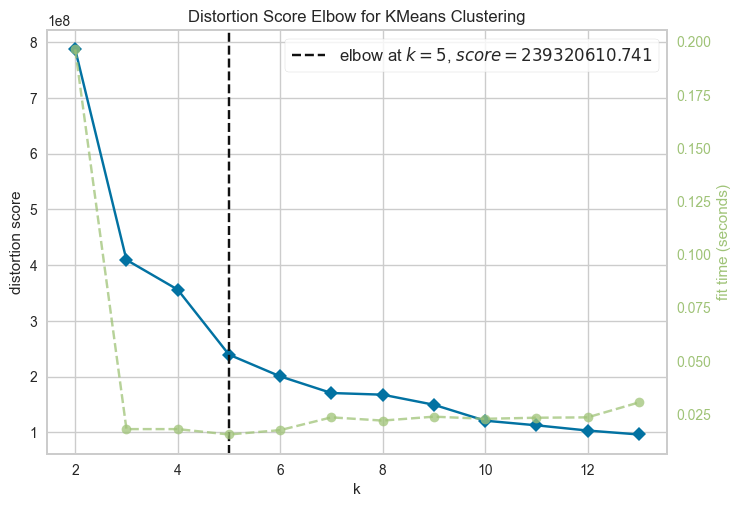

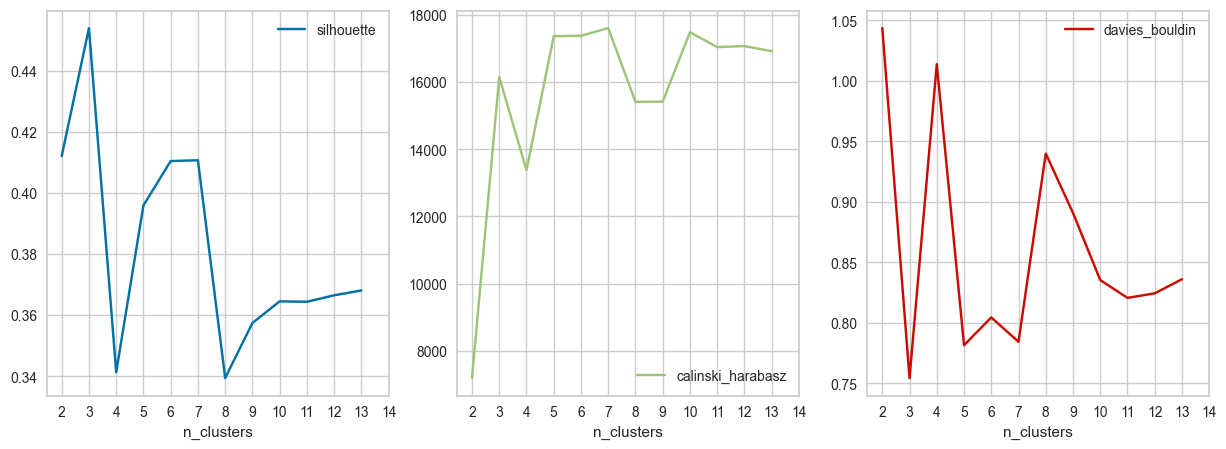

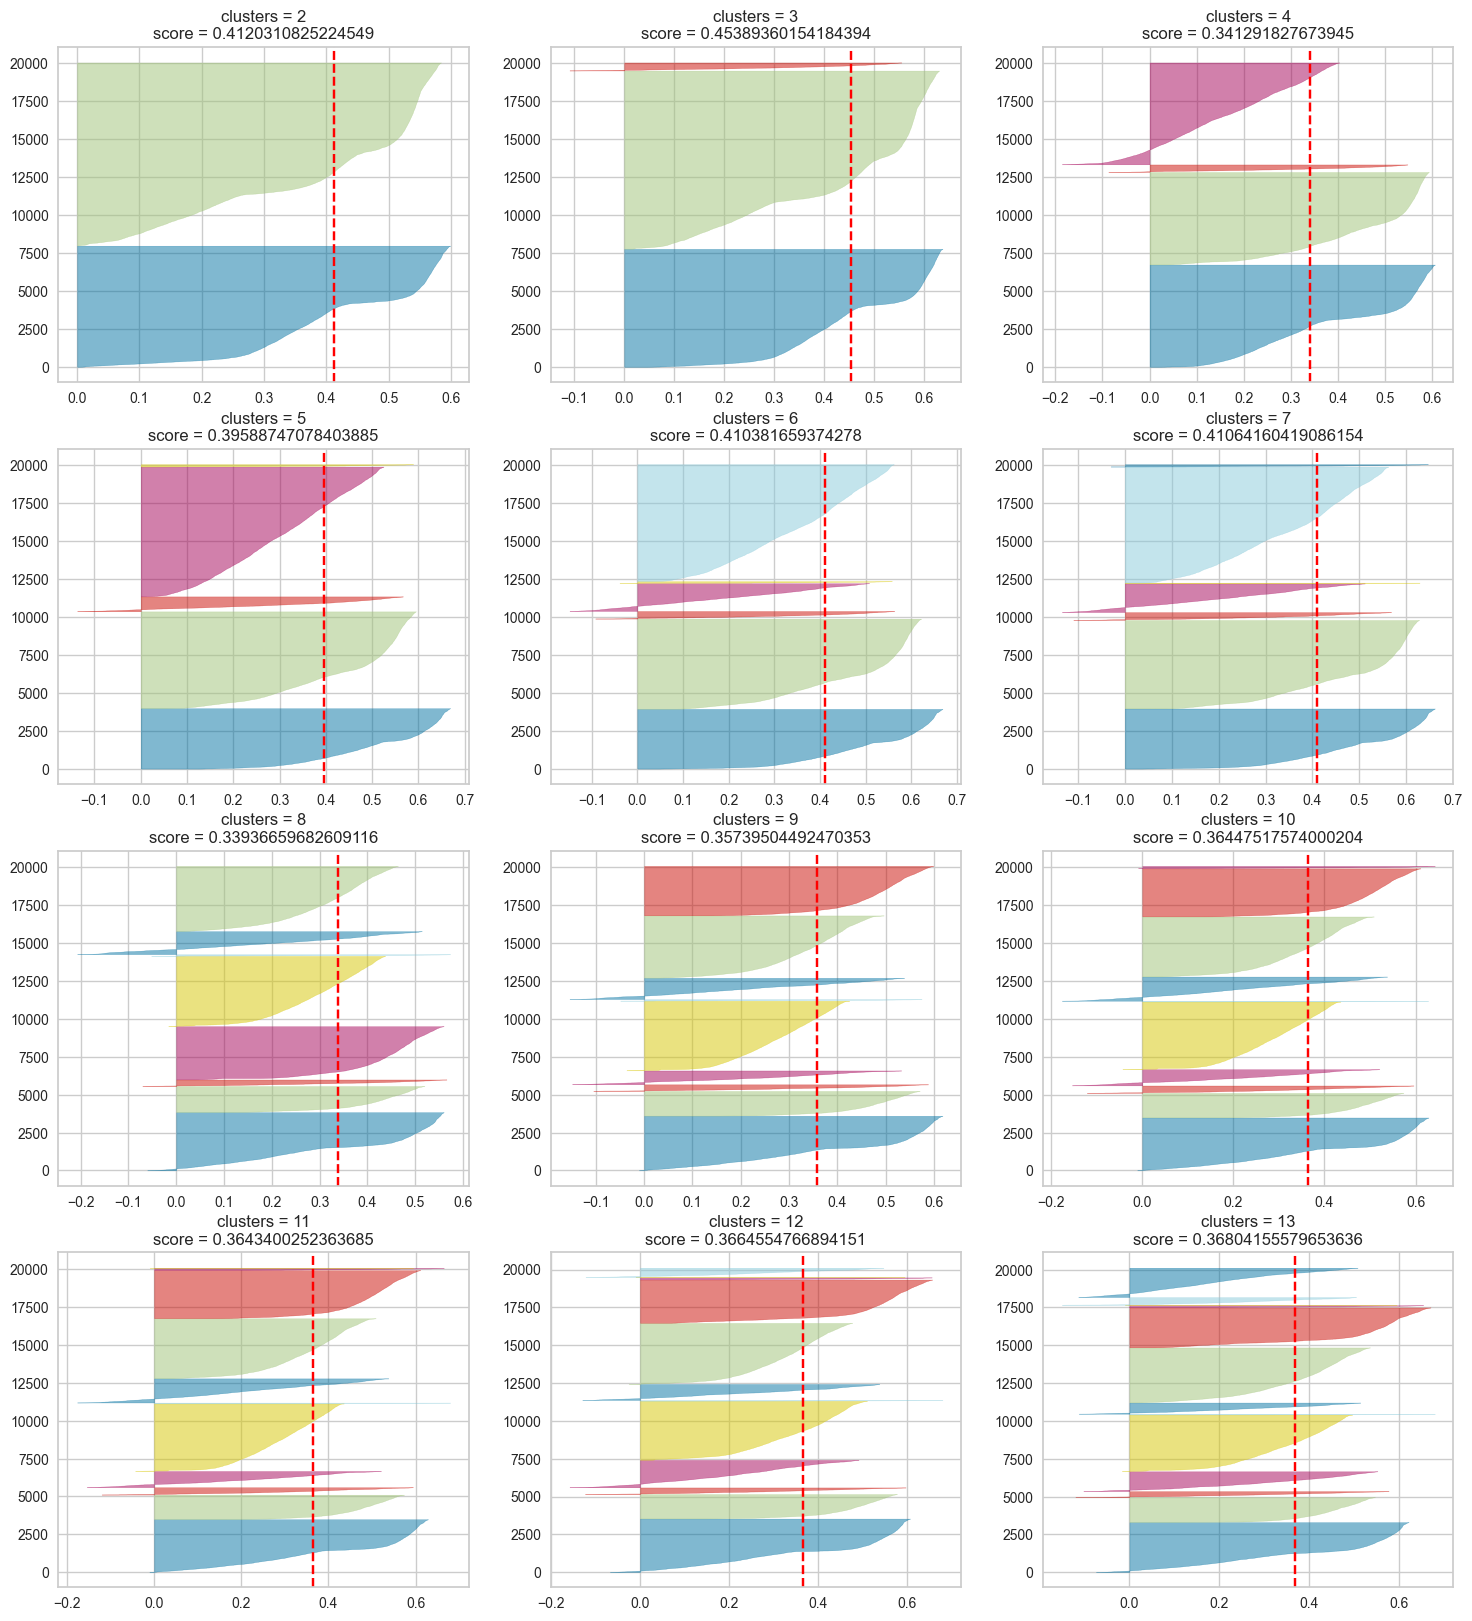

In [7]:
df_cluster_scores(df_sample_20, 2, 14, score_types=score_types)
multi_visualize_silhoutte(df_sample_20, 2, 13, per_col=3)

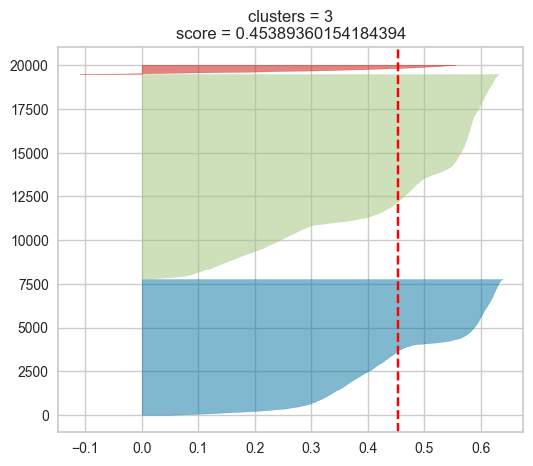

In [8]:
visualize_silhoutte(df_sample_20, 3)

### Testando sample de 20000 linhas normalizado

In [9]:
normalizer = MinMaxScaler()
df_sample_20_normalized = normalizer.fit_transform(df_sample_20)

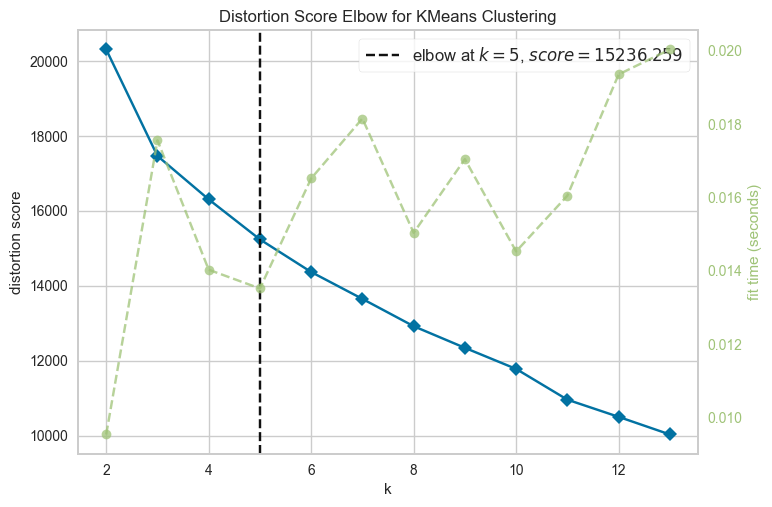

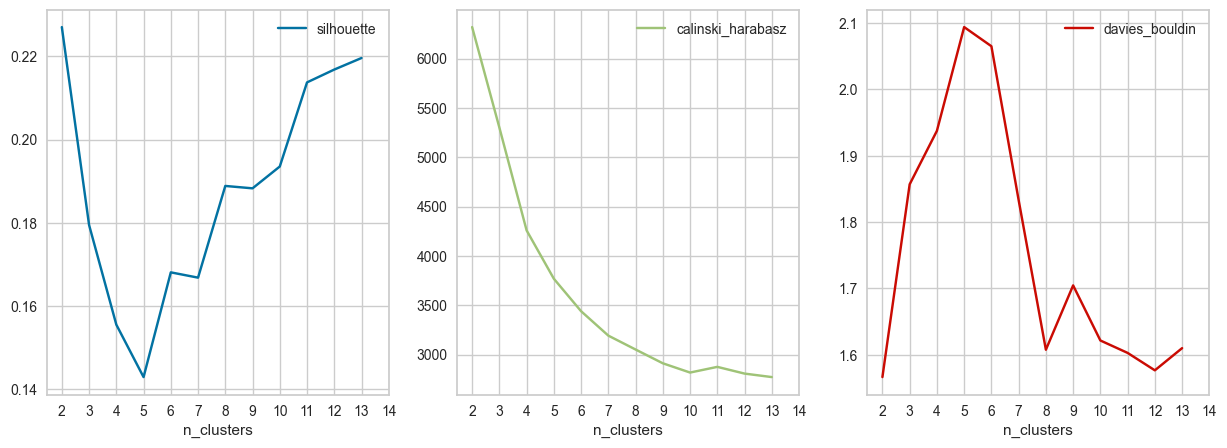

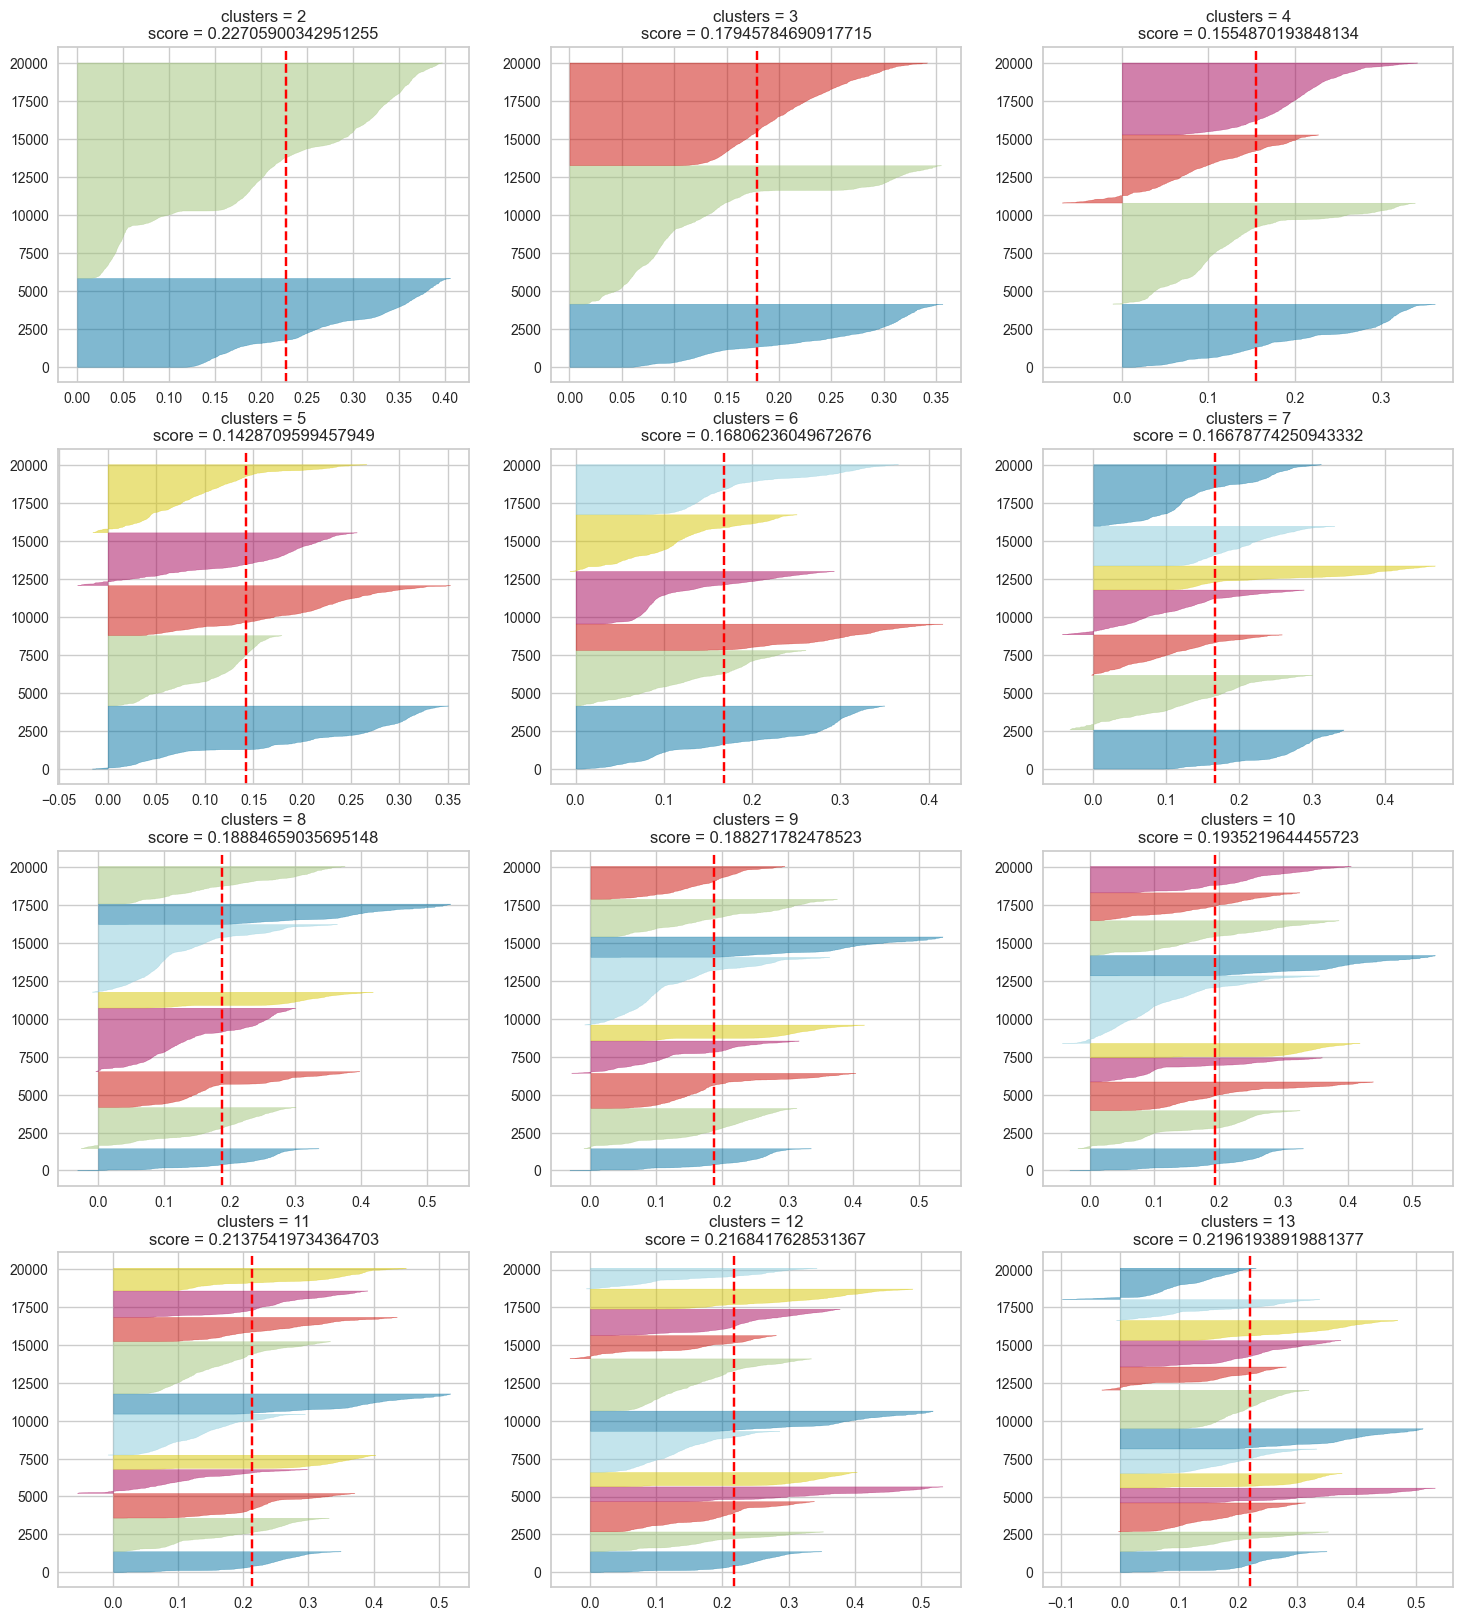

In [10]:
df_cluster_scores(df_sample_20_normalized, 2, 14, score_types=score_types)
multi_visualize_silhoutte(df_sample_20_normalized, 2, 13, per_col=3)

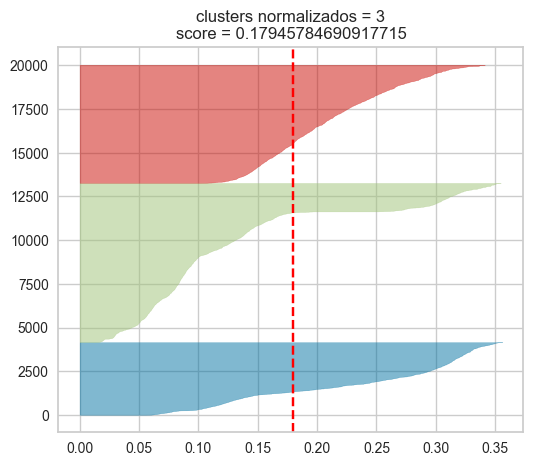

In [11]:
visualize_silhoutte(df_sample_20_normalized, 3, versao_cluster="clusters normalizados")

### Testando com sample de 20000 linhas padronizado

In [12]:
scaler = StandardScaler()
df_sample_20_standardized = scaler.fit_transform(df_sample_20)

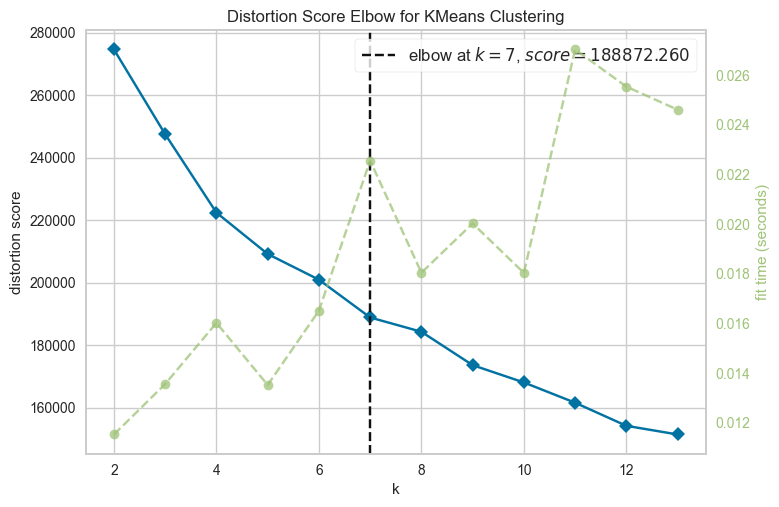

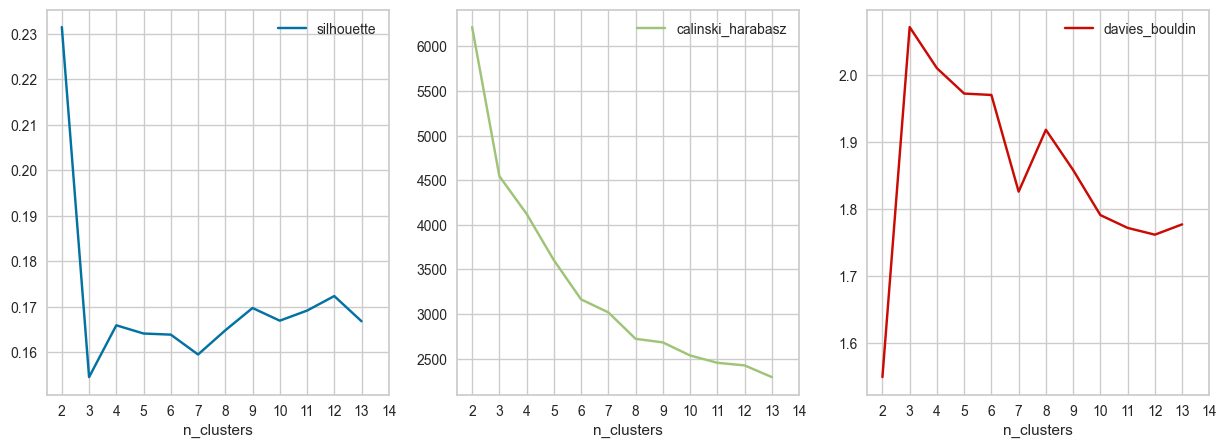

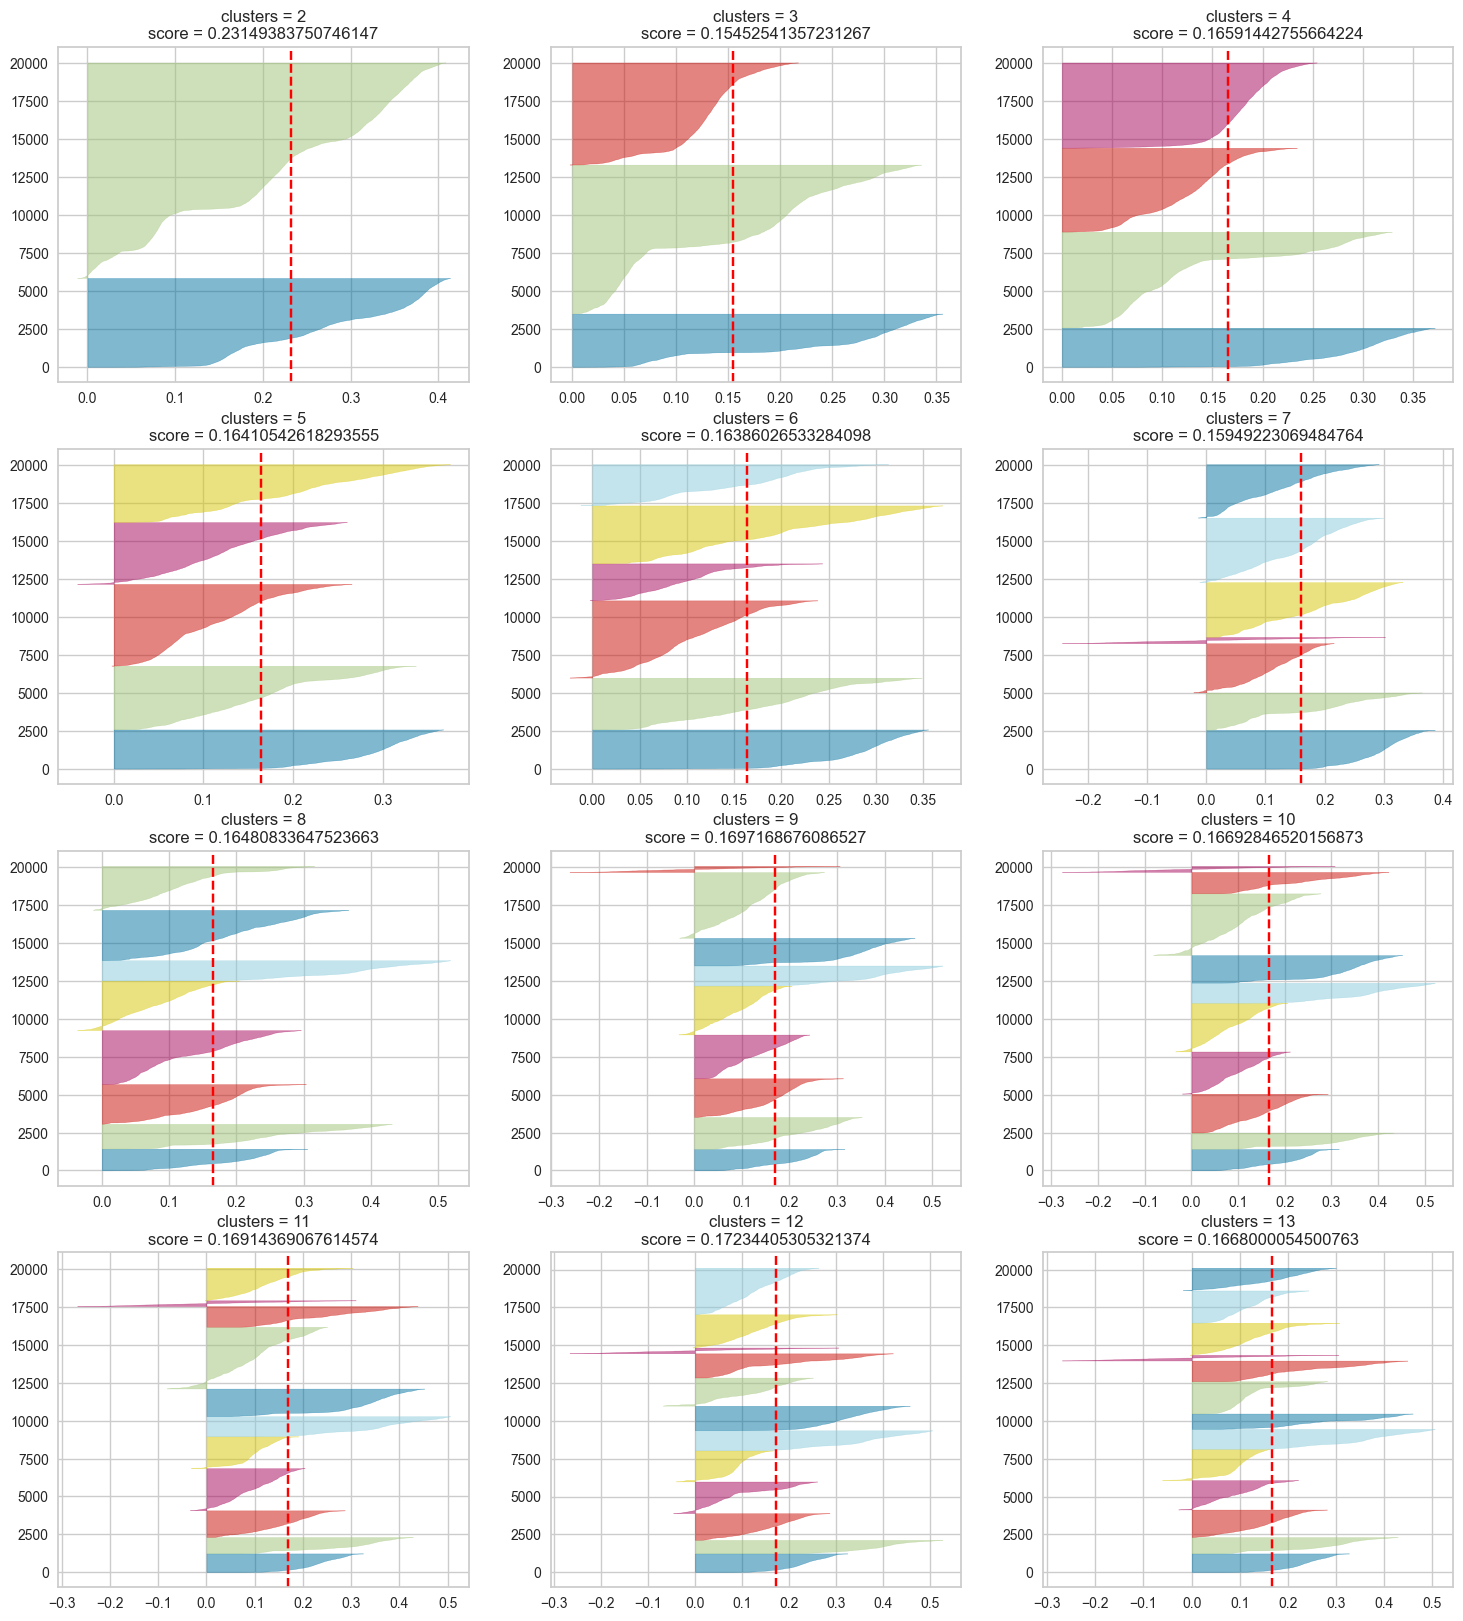

In [13]:
df_cluster_scores(df_sample_20_standardized, 2, 14, score_types=score_types)
multi_visualize_silhoutte(df_sample_20_standardized, 2, 13, per_col=3)

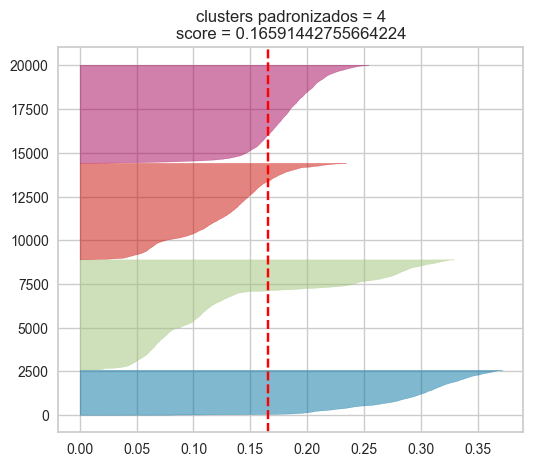

In [14]:
visualize_silhoutte(df_sample_20_standardized, 4, versao_cluster="clusters padronizados")

### Comparando melhor silhouetta para cada versão

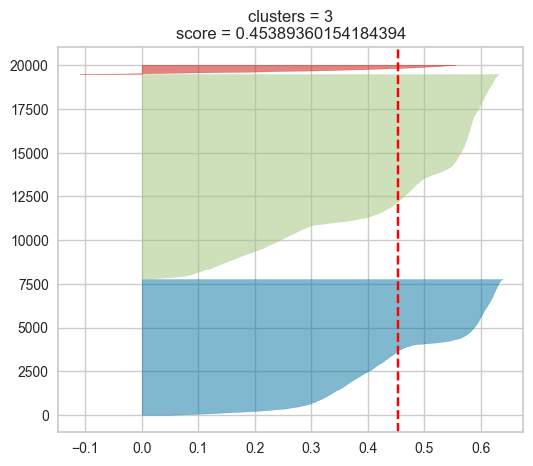

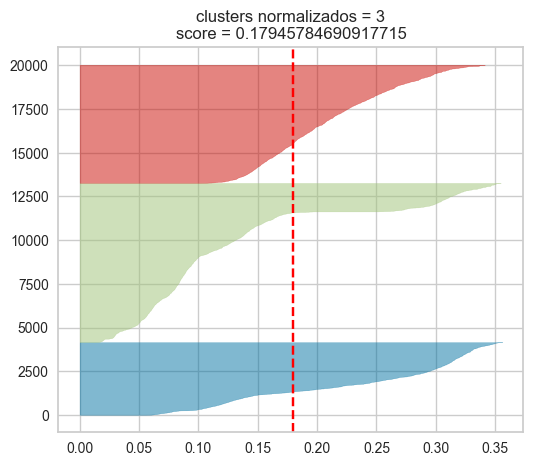

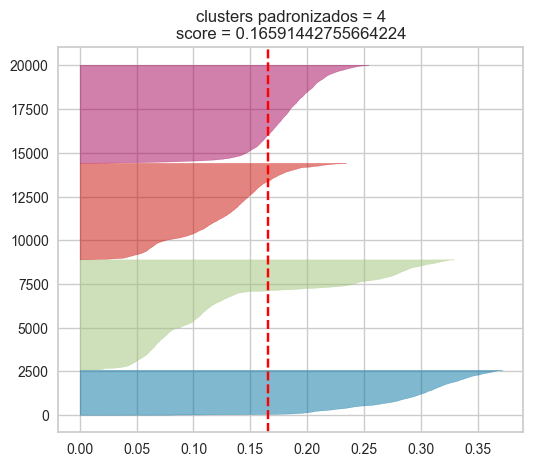

In [15]:
visualize_silhoutte(df_sample_20, 3)
visualize_silhoutte(df_sample_20_normalized, 3, versao_cluster="clusters normalizados")
visualize_silhoutte(df_sample_20_standardized, 4,versao_cluster="clusters padronizados")

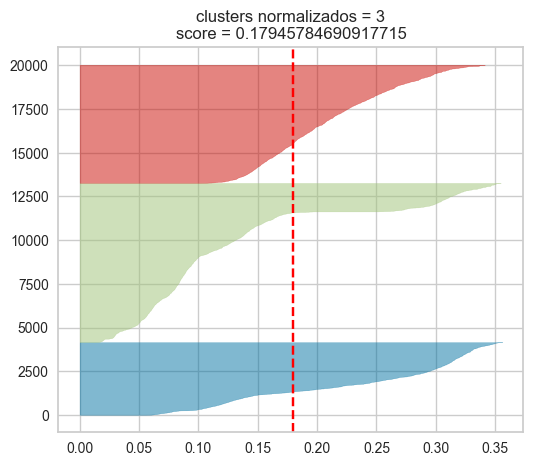

In [16]:
visualize_silhoutte(df_sample_20_normalized, 3, versao_cluster="clusters normalizados")

## Escolhendo a melhor versão do dataframe tratando os dados utilizados

### Tratando dataframe

In [17]:
df_cluster_clean = df_cluster.copy()

encoders = {}
with open("./../data/clean_data/labels_encoders.json", "r") as f:
    encoders = json.load(f)

categorias = encoders["filtered_category_coded"]
codigoOutros = int(list(categorias.keys())[list(categorias.values()).index("outros")])

df_cluster_clean = df_cluster_clean[df_cluster_clean["filtered_category_coded"] != codigoOutros]
df_cluster_clean

(87853, 18)

### Testando sample limpo de 20000 linhas

In [19]:
df_sample_20_clean = df_cluster_clean.sample(n=20000, random_state=42)

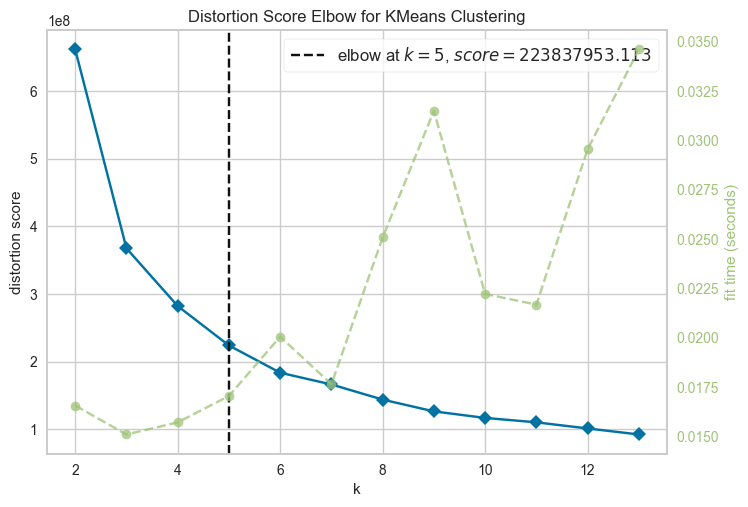

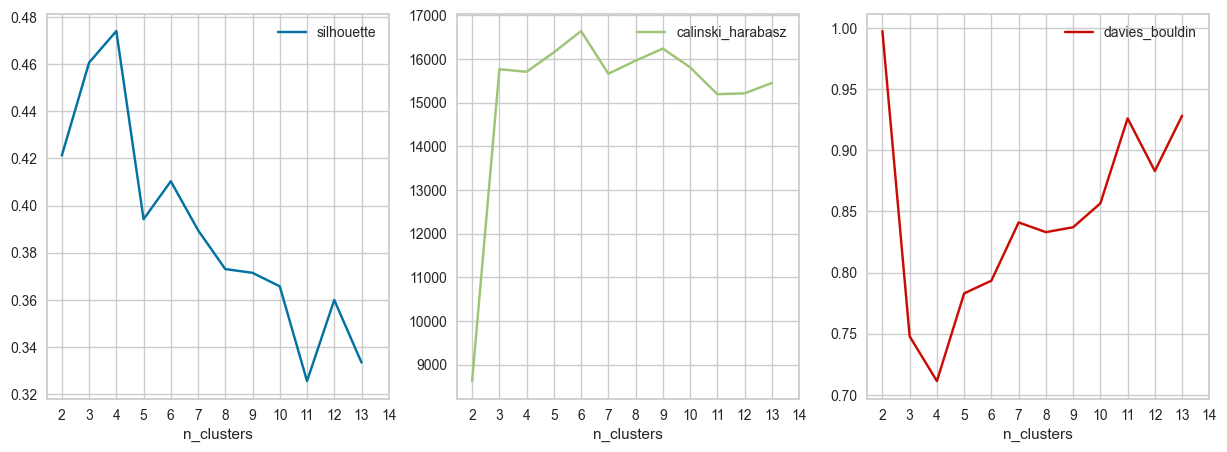

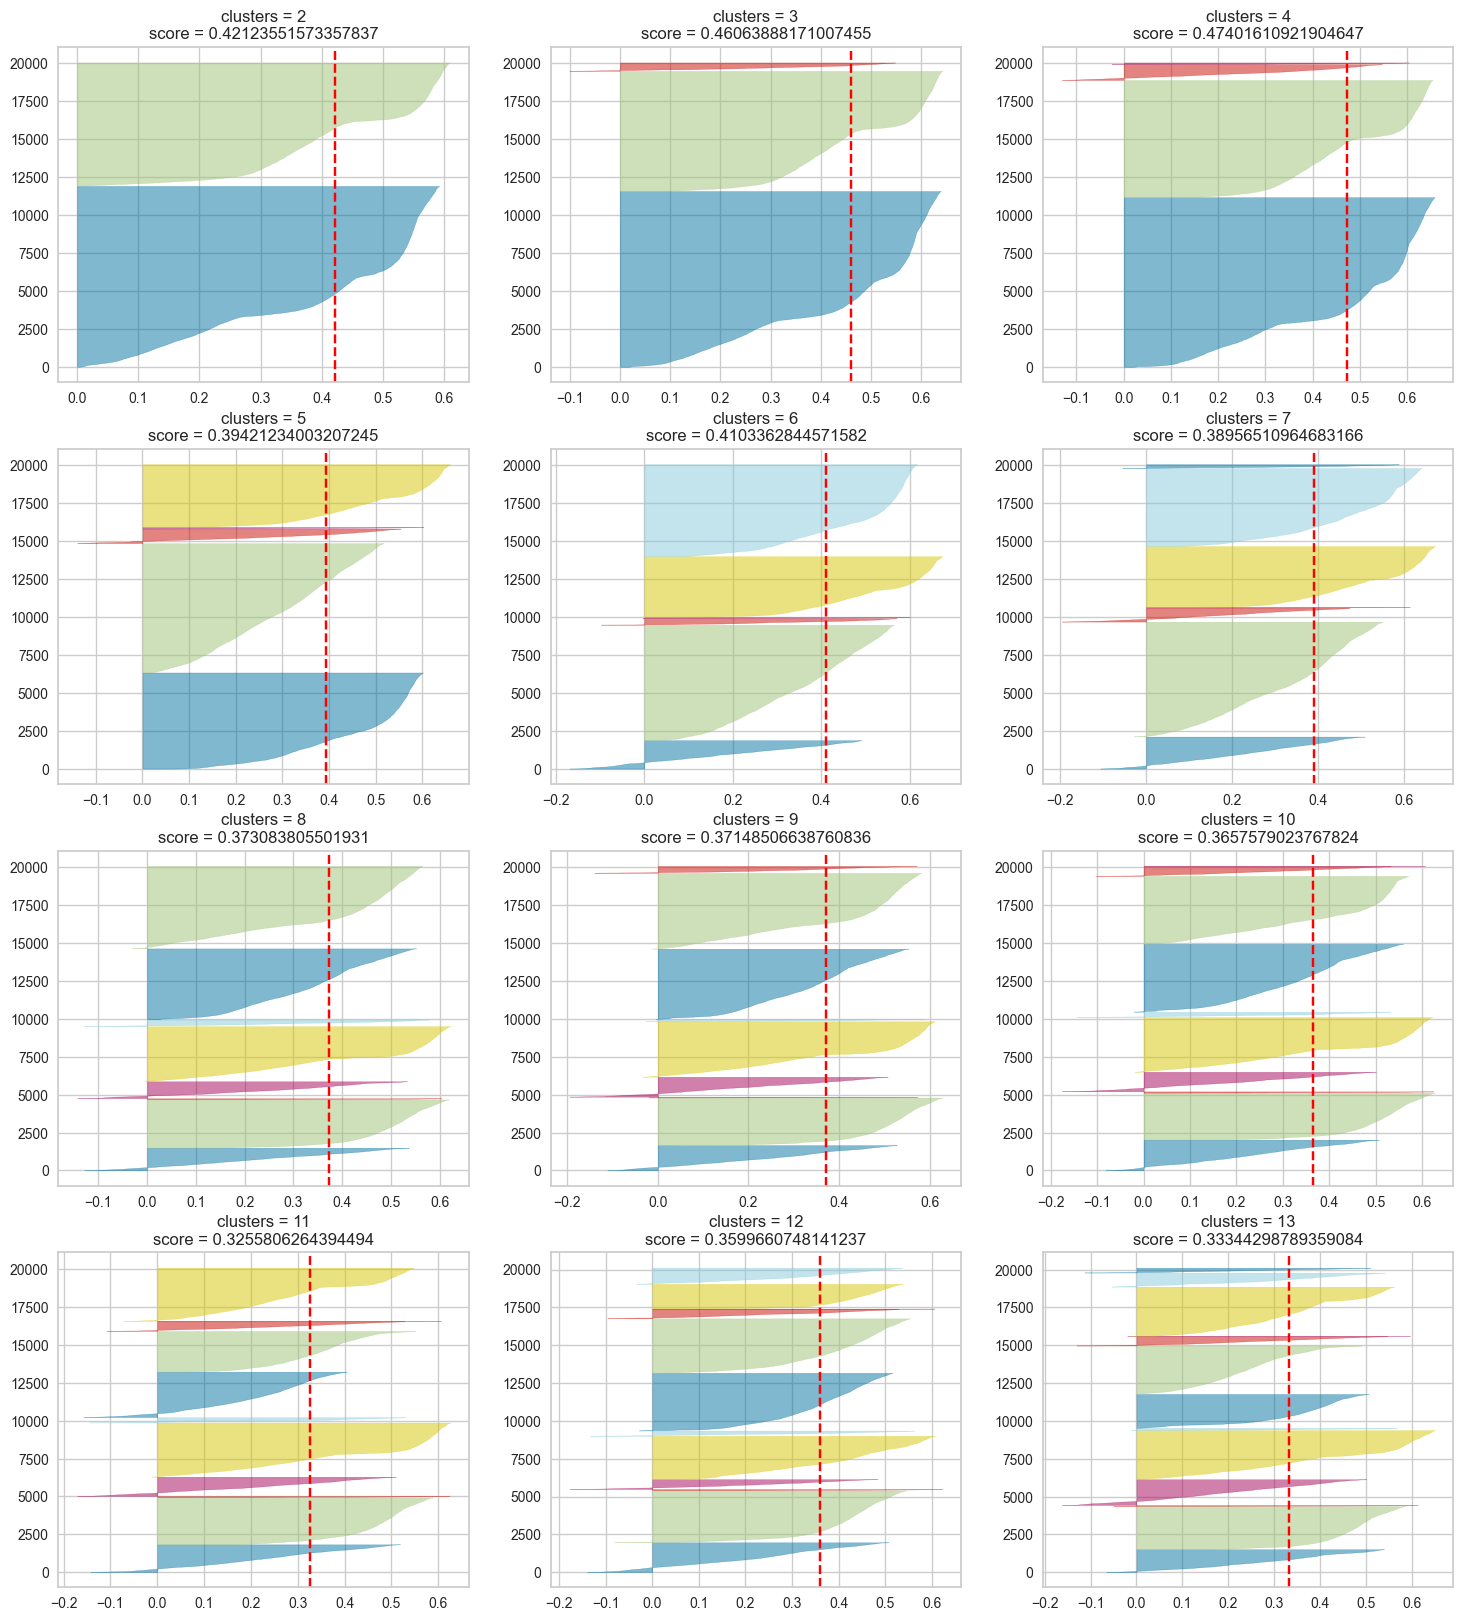

In [20]:
df_cluster_scores(df_sample_20_clean, 2, 14, score_types=score_types)
multi_visualize_silhoutte(df_sample_20_clean, 2, 13, per_col=3)

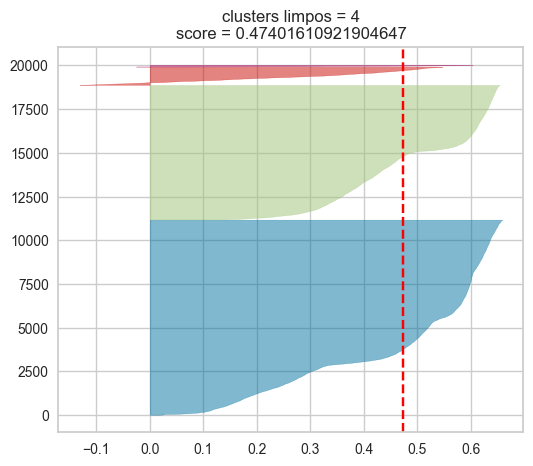

In [21]:
visualize_silhoutte(df_sample_20_clean, 4, versao_cluster="clusters limpos")

### Testando sample limpo de 20000 linhas normalizado

In [22]:
normalizer = MinMaxScaler()
df_sample_20_clean_normalized = normalizer.fit_transform(df_sample_20_clean)

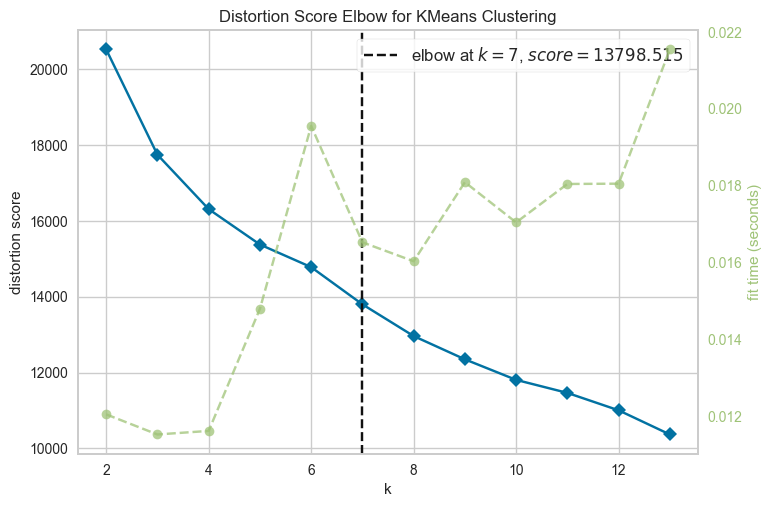

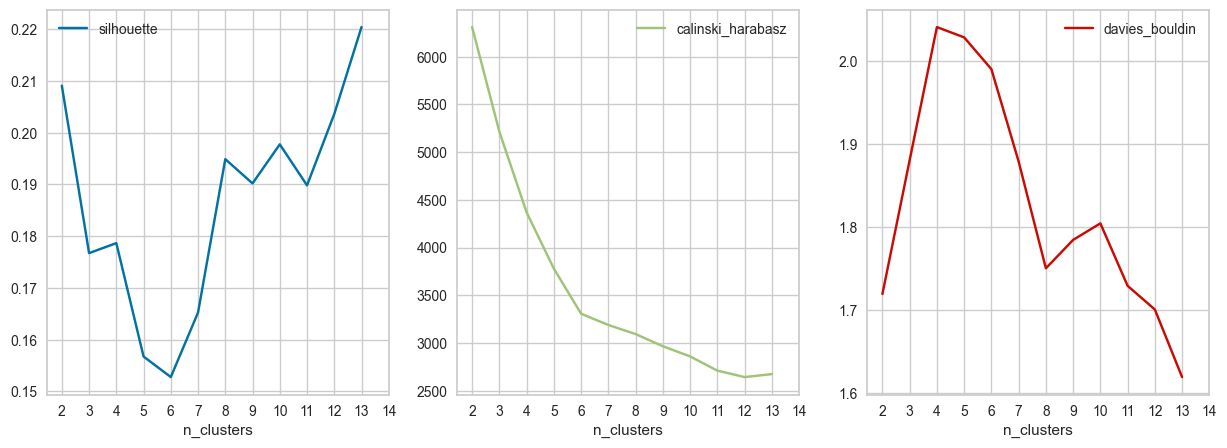

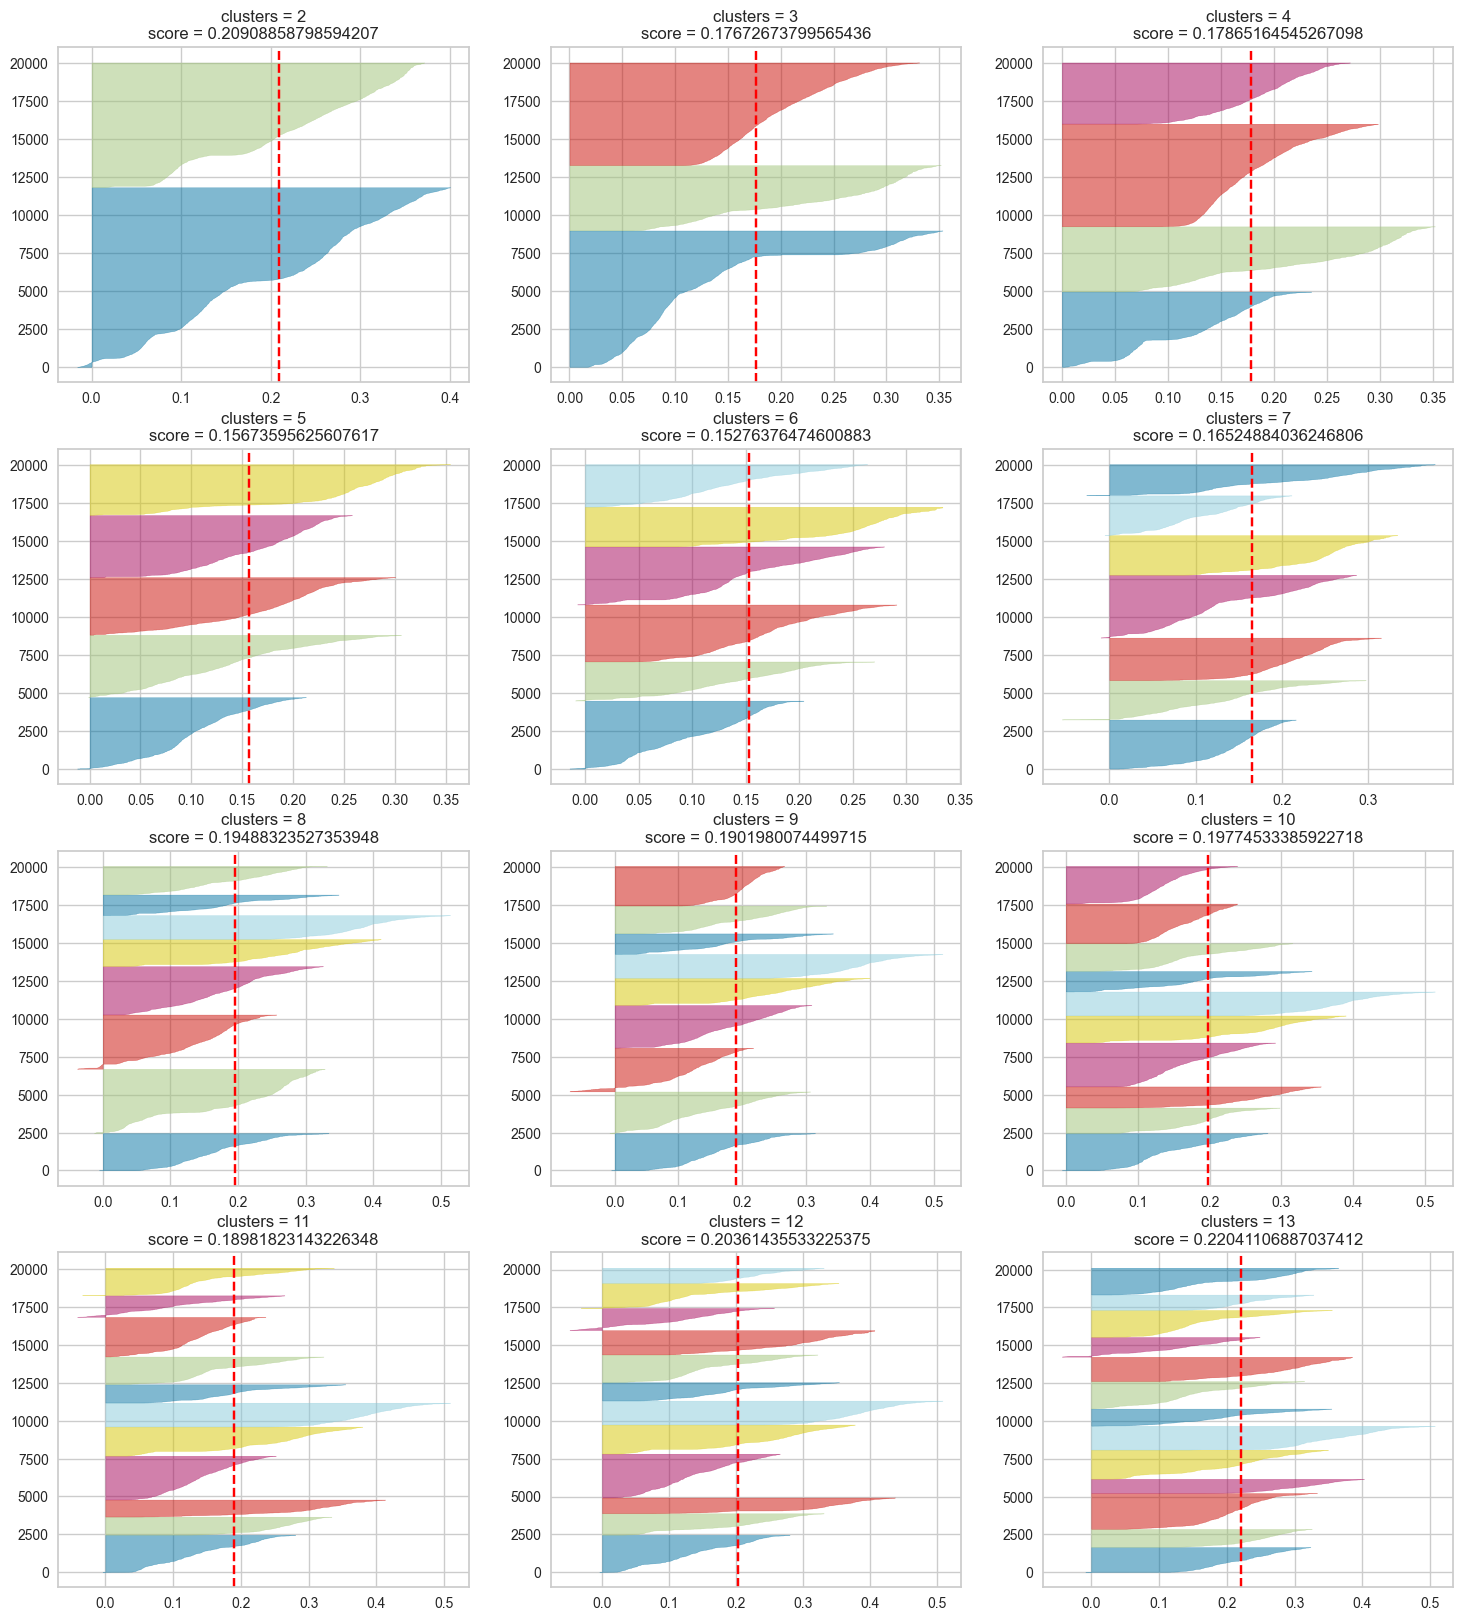

In [23]:
df_cluster_scores(df_sample_20_clean_normalized, 2, 14, score_types=score_types)
multi_visualize_silhoutte(df_sample_20_clean_normalized, 2, 13, per_col=3)

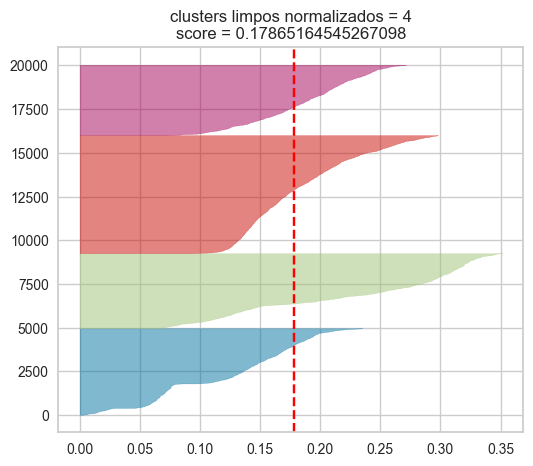

In [24]:
visualize_silhoutte(df_sample_20_clean_normalized, 4, versao_cluster="clusters limpos normalizados")

### Testando com sample limpo de 20000 linhas padronizado

In [25]:
scaler = StandardScaler()
df_sample_20_clean_standardized = scaler.fit_transform(df_sample_20_clean)

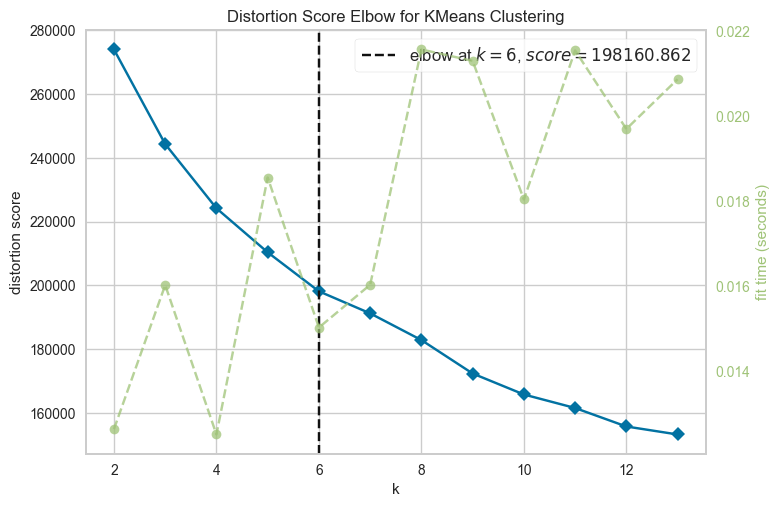

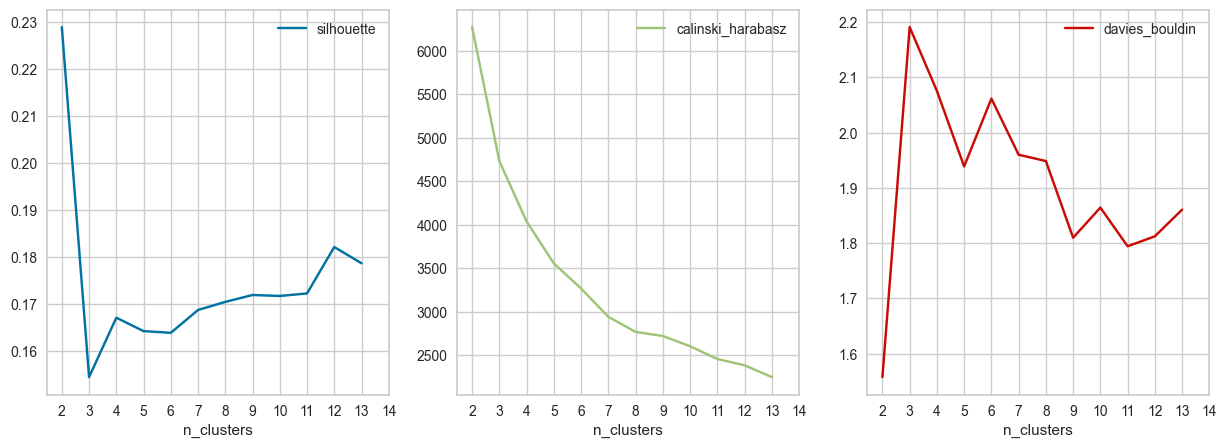

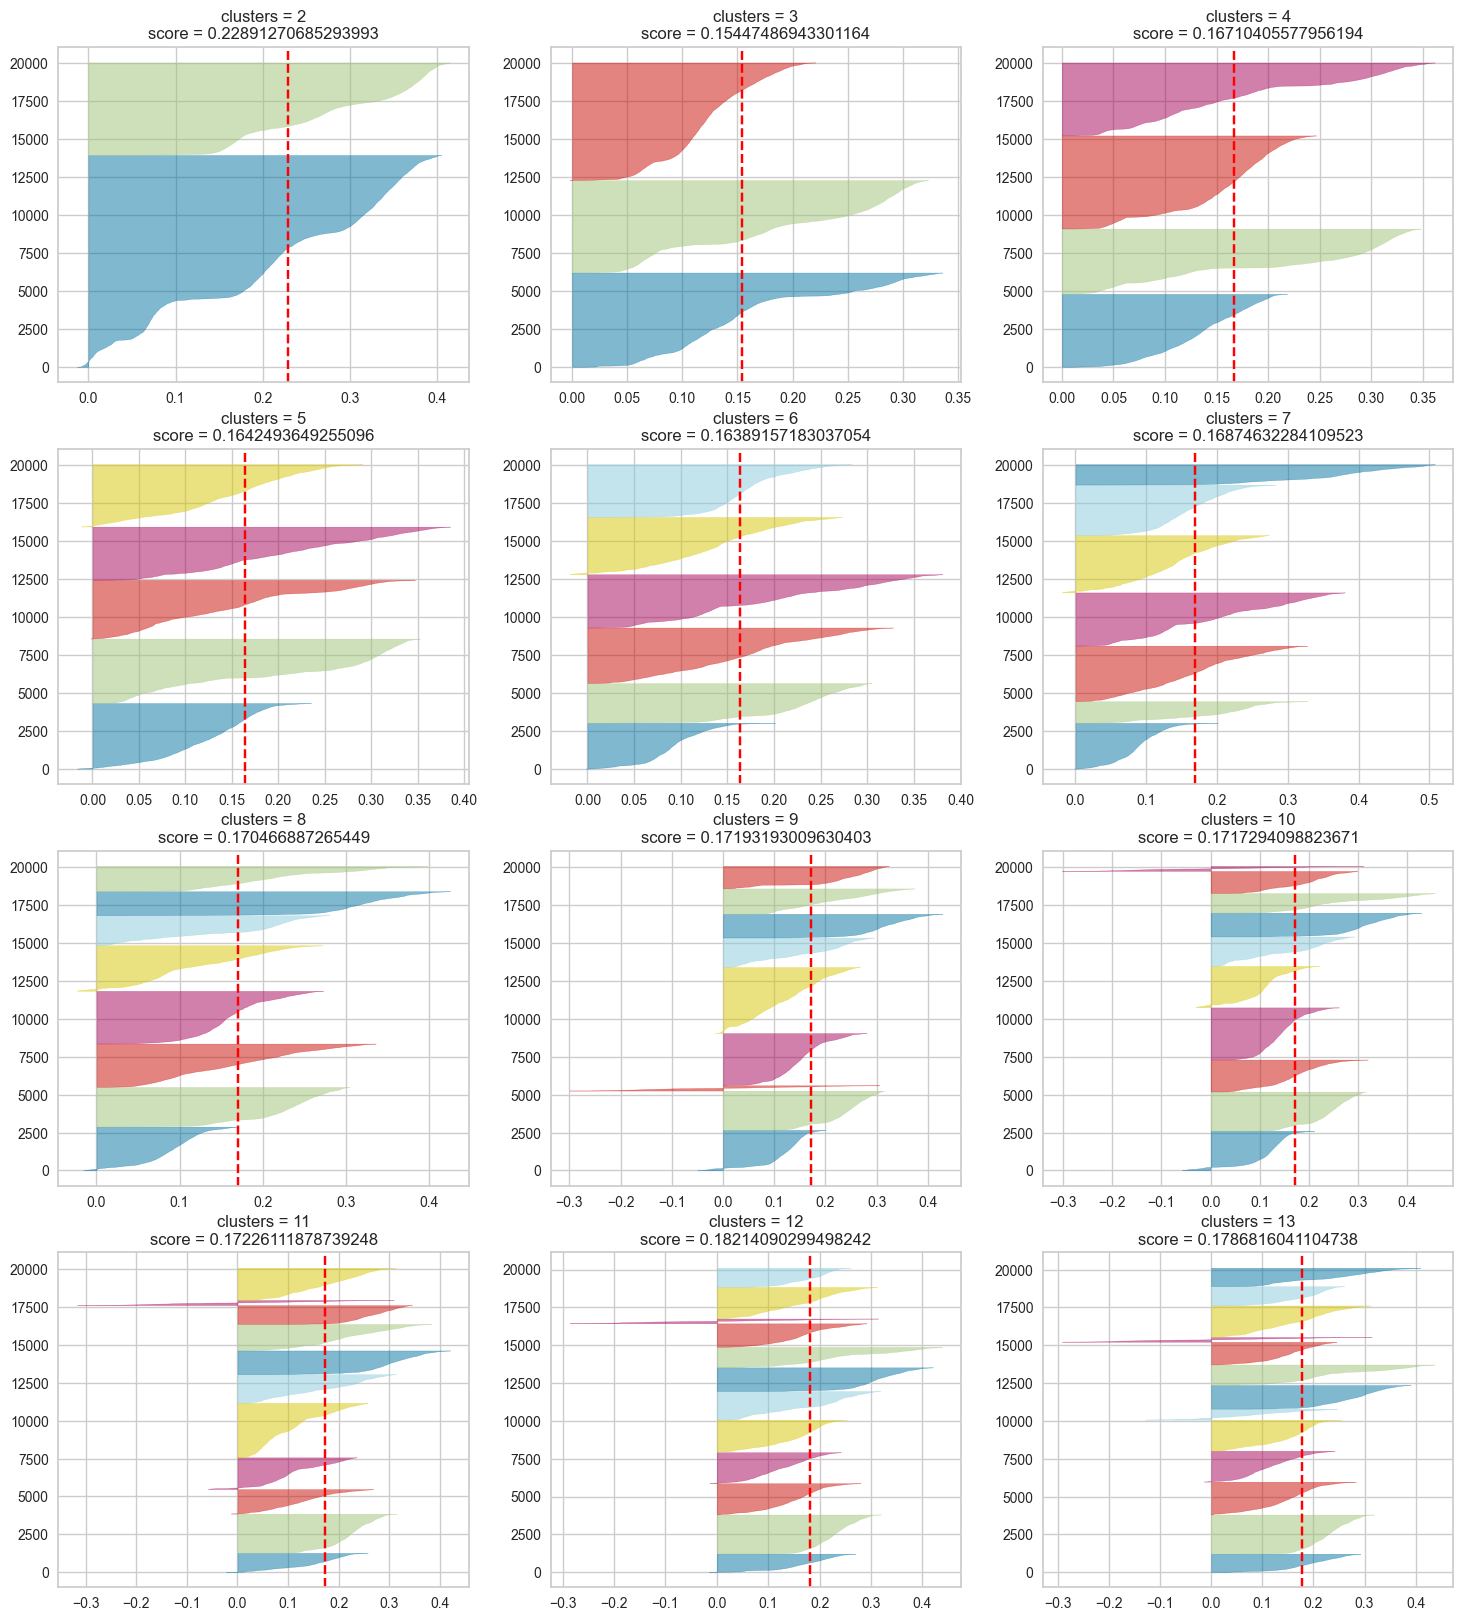

In [26]:
df_cluster_scores(df_sample_20_clean_standardized, 2, 14, score_types=score_types)
multi_visualize_silhoutte(df_sample_20_clean_standardized, 2, 13, per_col=3)

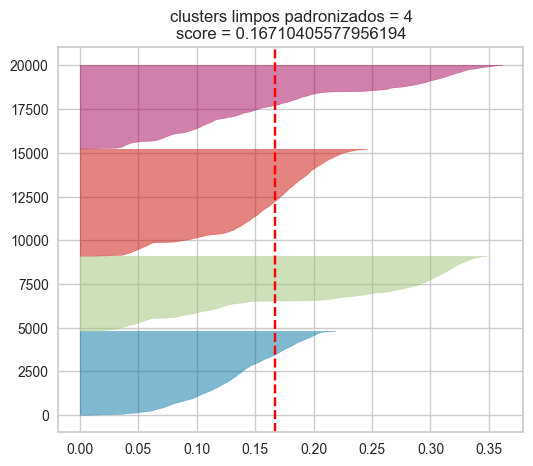

In [27]:
visualize_silhoutte(df_sample_20_clean_standardized, 4, versao_cluster="clusters limpos padronizados")

### Comparando melhor silhouetta para cada versão

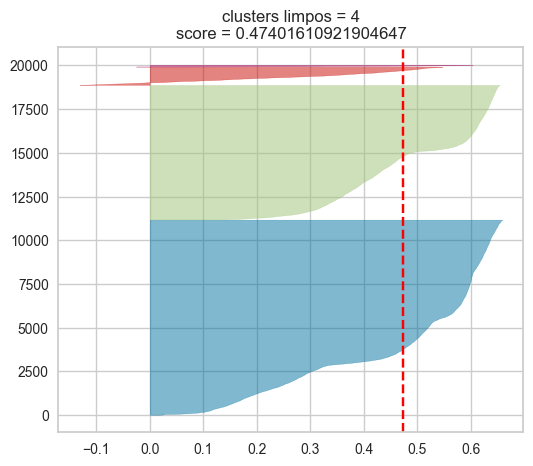

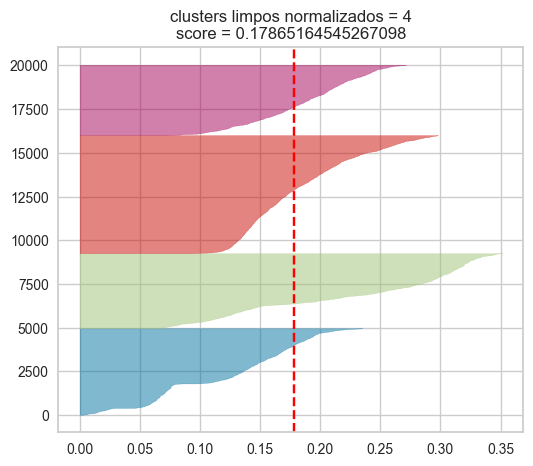

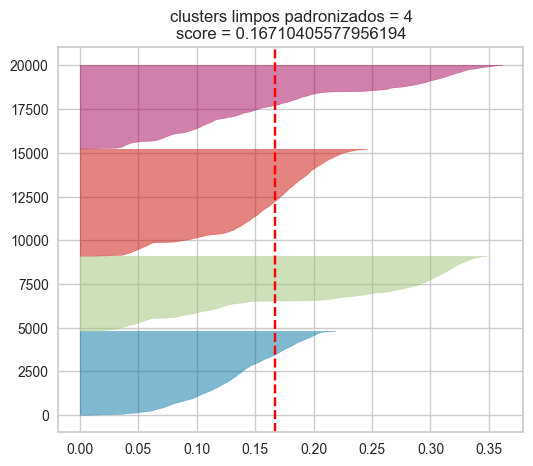

In [28]:
visualize_silhoutte(df_sample_20_clean, 4, versao_cluster="clusters limpos")
visualize_silhoutte(df_sample_20_clean_normalized, 4, versao_cluster="clusters limpos normalizados")
visualize_silhoutte(df_sample_20_clean_standardized, 4,versao_cluster="clusters limpos padronizados")

## Comparando melhores resultados


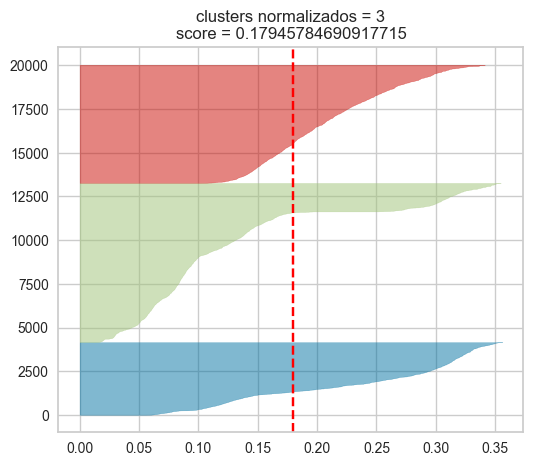

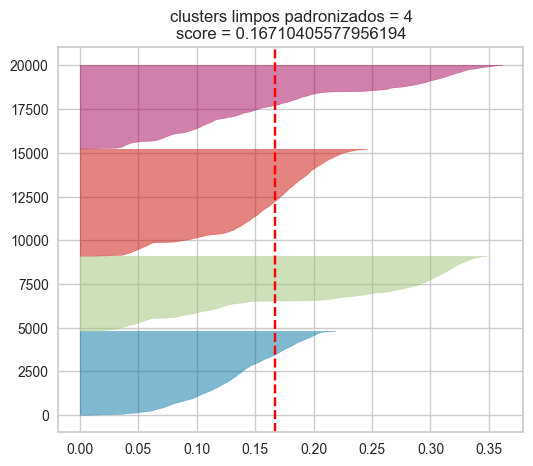

In [29]:
visualize_silhoutte(df_sample_20_normalized, 3, versao_cluster="clusters normalizados")
visualize_silhoutte(df_sample_20_clean_standardized, 4,versao_cluster="clusters limpos padronizados")

## Clusterizando dataframe limpo padronizado com PCA

In [30]:
df_cluster_clean

comdate_diff   price  freight_value  days_since_year_start_commercial  \
1                 11  289.00          46.48                                 0   
5                -28  259.90          22.31                               284   
6                -17   14.99           7.78                                66   
8                 17   25.00          14.10                                 0   
9                  7   99.90          22.57                                 0   
...              ...     ...            ...                               ...   
115012            -8   55.00          20.88                               358   
115014             3  114.90          14.16                                90   
115015             7   37.00          19.04                                90   
115016           -21  689.00          22.07                               327   
115017            -6   13.99           7.78                               358   

        days_since_month_start_commercial  year_commercial  month_commercial  \
1                                       0             2018                 1   
5                                      11             2017                10   
6                                       7             2018                 3   
8                                       0             2018                 1   
9                                       0             2018                 1   
...                                   ...              ...               ...   
115012                                 24             2017                12   
115014                                  0             2018                 4   
115015                                  0             2018                 4   
115016                                 23             2017                11   
115017                                 24             2017                12   

        day_of_month_commercial  day_of_week_commercial  \
1                             1                       0   
5                            12                       3   
6                             8                       3   
8                             1                       0   
9                             1                       0   
...                         ...                     ...   
115012                       25                       0   
115014                        1                       6   
115015                        1                       6   
115016                       24                       4   
115017                       25                       0   

        days_since_year_start_purchase  days_since_month_start_purchase  \
1                                   11                               11   
5                                  256                               13   
6                                   49                               18   
8                                   17                               17   
9                                    7                                7   
...                                ...                              ...   
115012                             350                               16   
115014                              93                                3   
115015                              97                                7   
115016                             306                                2   
115017                             352                               18   

        year_purchase  month_purchase  day_of_month_purchase  \
1                2018               1                     12   
5                2017               9                     14   
6                2018               2                     19   
8                2018               1                     18   
9                2018               1                      8   
...               ...             ...                    ...   
115012          

In [31]:
scaler = StandardScaler()
nparray_clean_standardized = scaler.fit_transform(df_cluster_clean)

df_clean_standardized_pca = pd.DataFrame({f'{df_cluster_clean.columns[i]}': nparray_clean_standardized[:,i] for i in range(nparray_clean_standardized.shape[1])})
df_clean_standardized_pca

comdate_diff     price  freight_value  \
0          0.780302  1.055425       1.855660   
1         -1.940158  0.877473       0.199845   
2         -1.172848 -0.620194      -0.795562   
3          1.198834 -0.558981      -0.362597   
4          0.501281 -0.100955       0.217657   
...             ...       ...            ...   
87848     -0.545050 -0.375526       0.101880   
87849      0.222259 -0.009227      -0.358487   
87850      0.501281 -0.485599      -0.024173   
87851     -1.451870  3.501494       0.183404   
87852     -0.405539 -0.626309      -0.795562   

       days_since_year_start_commercial  days_since_month_start_commercial  \
0                             -1.668686                          -1.631137   
1                              1.162687                           0.066896   
2                             -1.010691                          -0.550570   
3                             -1.668686                          -1.631137   
4                             -1.668686                          -1.631137   
...                                 ...                                ...   
87848                          1.900439                           2.073663   
87849                         -0.771420                          -1.631137   
87850                         -0.771420                          -1.631137   
87851                          1.591380                           1.919297   
87852                          1.900439                           2.073663   

       year_commercial  month_commercial  day_of_month_commercial  \
0             0.921937         -1.666223                -1.631137   
1            -1.058428          1.223847                 0.066896   
2             0.921937         -1.023985                -0.550570   
3             0.921937         -1.666223                -1.631137   
4             0.921937         -1.666223                -1.631137   
...                ...               ...                      ...   
87848        -1.058428          1.866085                 2.073663   
87849         0.921937         -0.702866                -1.631137   
87850         0.921937         -0.702866                -1.631137   
87851        -1.058428          1.544966                 1.919297   
87852        -1.058428          1.866085                 2.073663   

       day_of_week_commercial  days_since_year_start_purchase  \
0                   -1.590507                       -1.595108   
1                   -0.287425                        0.891229   
2                   -0.287425                       -1.209472   
3                   -1.590507                       -1.534218   
4                   -1.590507                       -1.635701   
...                       ...                             ...   
87848               -1.590507                        1.845171   
87849                1.015657                       -0.762946   
87850                1.015657                       -0.722353   
87851                0.146936                        1.398645   
87852               -1.590507                        1.865468   

       days_since_month_start_purchase  year_purchase  month_purchase  \
0                            -0.410424       0.926976       -1.573629   
1                            -0.179580      -1.052693        0.904711   
2                             0.397529       0.926976       -1.263836   
3                             0.282107       0.926976       -1.573629   
4                            -0.872110       0.926976       -1.573629   
...                                ...            ...             ...   
87848                         0.166685      -1.052693        1.834089   
87849                        -1.333797       0.926976       -0.644251   
87850                        -0.872110       0.926976       -0.644251   
87851                        -1.449219      -1.052693        1.524296   
87852                         0.397529      -1.052693        1.834089   

      

### Realizando PCA

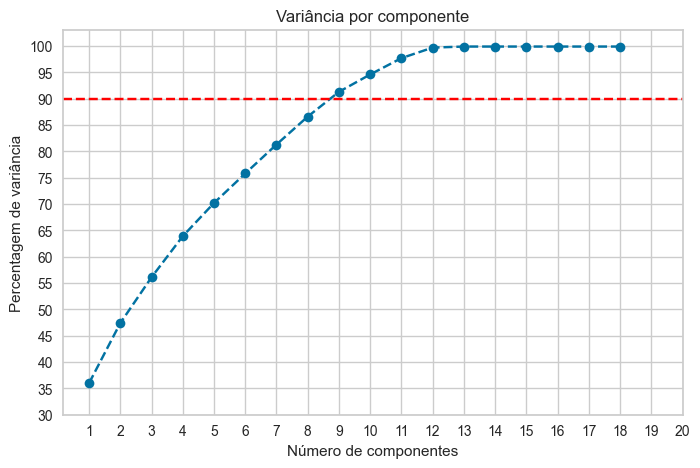

array([36. , 47.4, 56.1, 63.9, 70.2, 75.8, 81.3, 86.6, 91.3, 94.6, 97.7,
       99.7, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9])

In [40]:
pca = PCA()
pca.fit(df_clean_standardized_pca)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
treshold = 90
plt.figure(figsize = (8,5))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid(True)
plt.xticks(list(np.arange(1, 21, 1)))
plt.yticks(list(np.arange(30, 101, 5)))
plt.ylabel("Percentagem de variância")
plt.xlabel("Número de componentes")
plt.title("Variância por componente")
plt.axhline(y=treshold, color="red", linestyle = "--")
plt.show()

In [42]:
pca = PCA(n_components = 9)
pca.fit(df_clean_standardized_pca)
score_pca_df = pca.transform(df_clean_standardized_pca)

### Clusterizando dataframe limpo padronizado com PCA
### KMeans 5 clusters

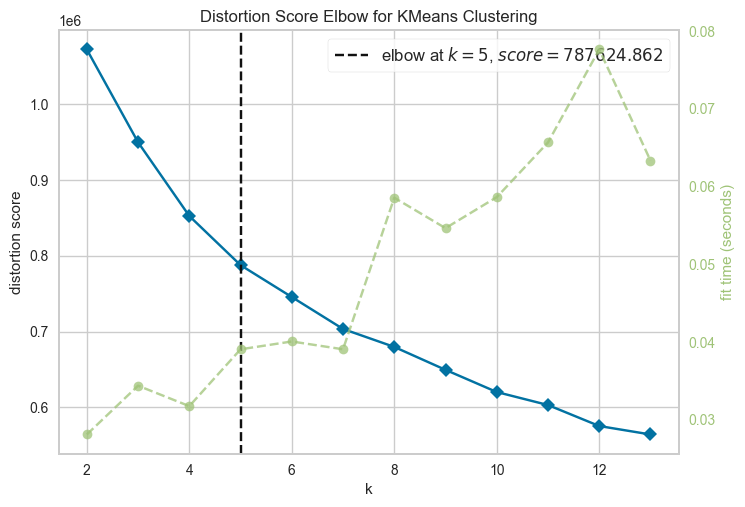

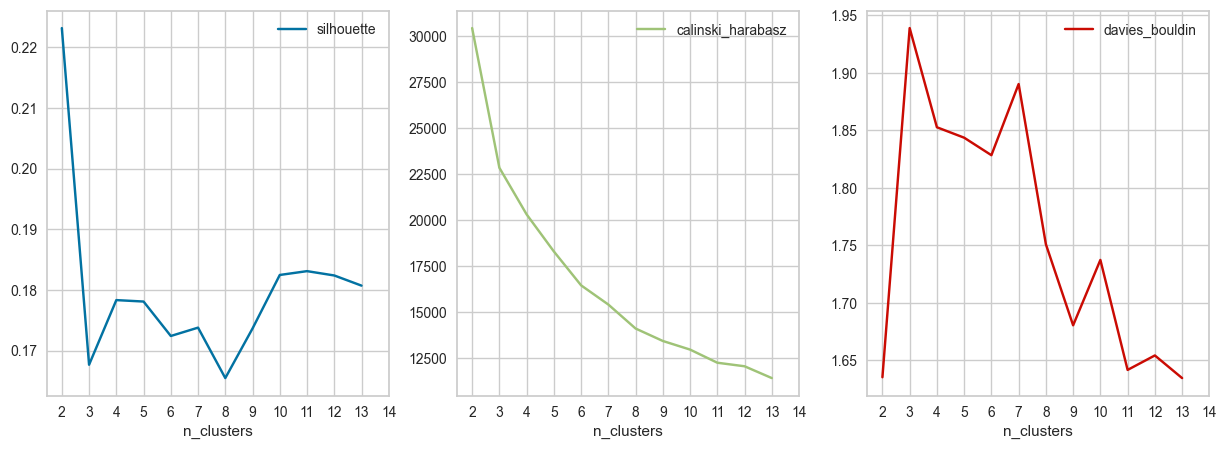

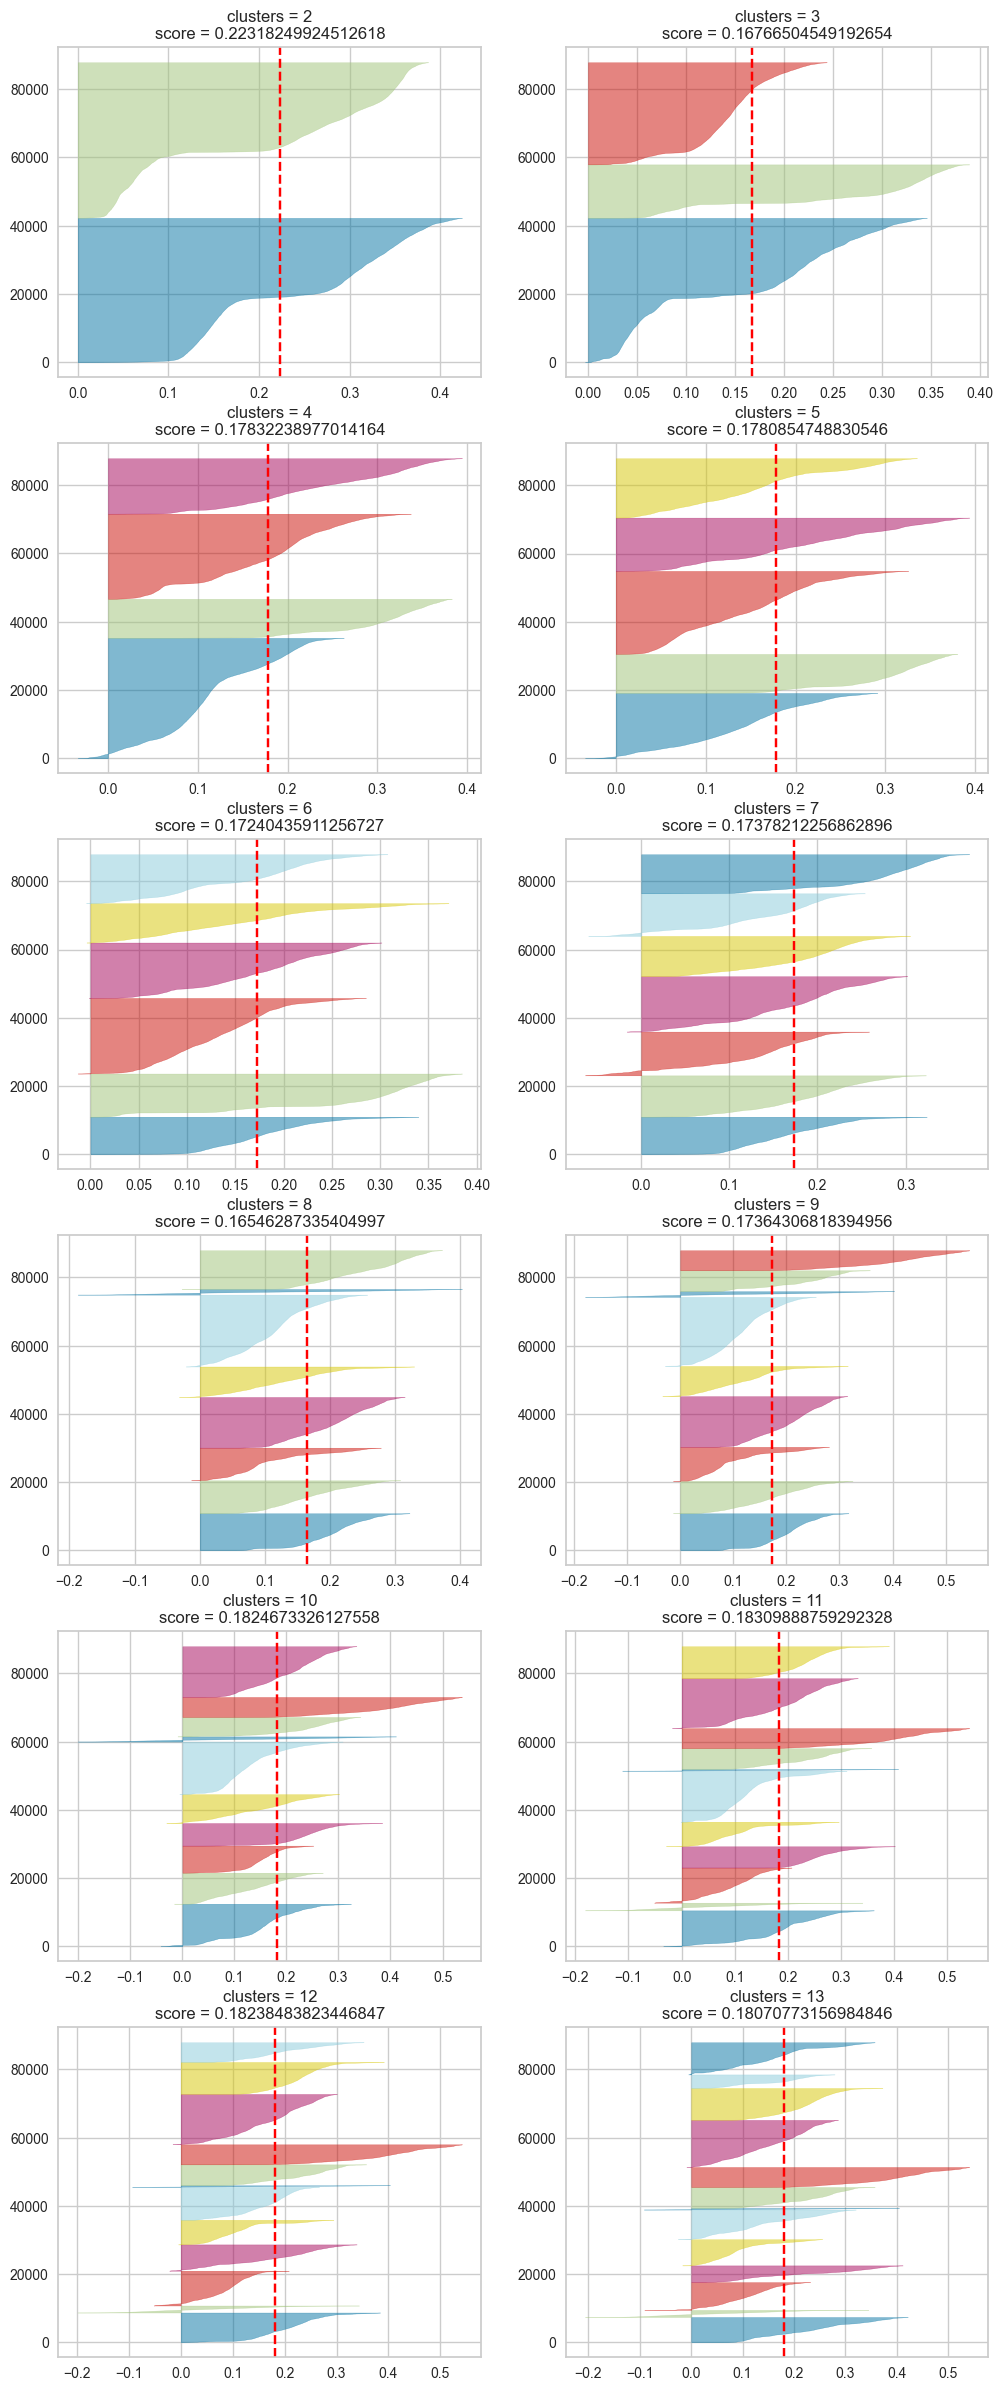

In [51]:
df_cluster_scores(score_pca_df, 2, 14, score_types=score_types)
multi_visualize_silhoutte(score_pca_df, 2, 14)

In [53]:
n_clusters = 5
kmeans_model = KMeans(n_clusters, random_state=42)
clusters = kmeans_model.fit_predict(score_pca_df)
df_kmeans = pd.DataFrame(clusters)
df_kmeans

0
0      3
1      2
2      4
3      3
4      3
...   ..
87848  1
87849  3
87850  3
87851  1
87852  1

[87853 rows x 1 columns]

In [91]:
cluster_clean_pca_kmeans = pd.concat([df_cluster_clean, pd.DataFrame(score_pca_df)], axis = 1)
cluster_clean_pca_kmeans.columns.values[-9:] = [f"pca_c{i}" for i in range(1, 10)]
cluster_clean_pca_kmeans["cluster"] = kmeans_model.labels_
cluster_clean_pca_kmeans["hue"] = cluster_clean_pca_kmeans["cluster"].map({0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3", 3:"Cluster 4", 4:"Cluster 5"})
cluster_clean_pca_kmeans

comdate_diff   price  freight_value  days_since_year_start_commercial  \
0                11  289.00          46.48                                 0   
1               -28  259.90          22.31                               284   
2               -17   14.99           7.78                                66   
3                17   25.00          14.10                                 0   
4                 7   99.90          22.57                                 0   
...             ...     ...            ...                               ...   
87848            -8   55.00          20.88                               358   
87849             3  114.90          14.16                                90   
87850             7   37.00          19.04                                90   
87851           -21  689.00          22.07                               327   
87852            -6   13.99           7.78                               358   

       days_since_month_start_commercial  year_commercial  month_commercial  \
0                                      0             2018                 1   
1                                     11             2017                10   
2                                      7             2018                 3   
3                                      0             2018                 1   
4                                      0             2018                 1   
...                                  ...              ...               ...   
87848                                 24             2017                12   
87849                                  0             2018                 4   
87850                                  0             2018                 4   
87851                                 23             2017                11   
87852                                 24             2017                12   

       day_of_month_commercial  day_of_week_commercial  \
0                            1                       0   
1                           12                       3   
2                            8                       3   
3                            1                       0   
4                            1                       0   
...                        ...                     ...   
87848                       25                       0   
87849                        1                       6   
87850                        1                       6   
87851                       24                       4   
87852                       25                       0   

       days_since_year_start_purchase  ...    pca_c2    pca_c3    pca_c4  \
0                                  11  ... -0.558819  0.793751  1.827585   
1                                 256  ... -0.399795 -0.173303  0.684707   
2                                  49  ...  0.863258 -2.044877 -1.407317   
3                                  17  ...  0.507170  1.389818 -0.397097   
4                                   7  ... -1.032585  1.065877  0.020904   
...                               ...  ...       ...       ...       ...   
87848                             350  ...  0.237284  0.210100 -0.368283   
87849                              93  ... -1.608476 -0.156114 -0.237755   
87850                              97  ... -1.048342  0.065698 -0.131903   
87851                             306  ... -2.116085 -2.108510  1.925960   
87852                             352  ...  0.106957  1.477364 -0.808787   

         pca_c5    pca_c6    pca_c7    pca_c8    pca_c9  cluster        hue  
0     -0.792565  1.581723  1.344915 -0.237563 -0.841867        0  Cluster 1  
1     -0.623487 -0.234484 -0.316109  1.016756 -0.409885        1  Cluster 2  
2     -1.344421 -0.897858  0.934062 -0.922977  0.152273        0  Cluster 1  
3     -0.257983 -0.361168 -0.755865 -1.015473 -0.564843        0  Cluster 1  
4     -0.462326 -1.001373  1.274313 -0.067337 -0.877298        0  Cluster 1  
...         ...    

### Exportando resultado da clusterização


In [92]:
cluster_clean_pca_kmeans.to_parquet(f"./../data/clean_data/cluster_clean_std_pca_kmeans_5.parquet")

## Clusterizando dataframe limpo padronizado

In [93]:
scaler = StandardScaler()
nparray_clean_standardized = scaler.fit_transform(df_cluster_clean)

df_clean_standardized = pd.DataFrame({f'{df_cluster_clean.columns[i]}': nparray_clean_standardized[:,i] for i in range(nparray_clean_standardized.shape[1])})
df_clean_standardized

comdate_diff     price  freight_value  \
0          0.780302  1.055425       1.855660   
1         -1.940158  0.877473       0.199845   
2         -1.172848 -0.620194      -0.795562   
3          1.198834 -0.558981      -0.362597   
4          0.501281 -0.100955       0.217657   
...             ...       ...            ...   
87848     -0.545050 -0.375526       0.101880   
87849      0.222259 -0.009227      -0.358487   
87850      0.501281 -0.485599      -0.024173   
87851     -1.451870  3.501494       0.183404   
87852     -0.405539 -0.626309      -0.795562   

       days_since_year_start_commercial  days_since_month_start_commercial  \
0                             -1.668686                          -1.631137   
1                              1.162687                           0.066896   
2                             -1.010691                          -0.550570   
3                             -1.668686                          -1.631137   
4                             -1.668686                          -1.631137   
...                                 ...                                ...   
87848                          1.900439                           2.073663   
87849                         -0.771420                          -1.631137   
87850                         -0.771420                          -1.631137   
87851                          1.591380                           1.919297   
87852                          1.900439                           2.073663   

       year_commercial  month_commercial  day_of_month_commercial  \
0             0.921937         -1.666223                -1.631137   
1            -1.058428          1.223847                 0.066896   
2             0.921937         -1.023985                -0.550570   
3             0.921937         -1.666223                -1.631137   
4             0.921937         -1.666223                -1.631137   
...                ...               ...                      ...   
87848        -1.058428          1.866085                 2.073663   
87849         0.921937         -0.702866                -1.631137   
87850         0.921937         -0.702866                -1.631137   
87851        -1.058428          1.544966                 1.919297   
87852        -1.058428          1.866085                 2.073663   

       day_of_week_commercial  days_since_year_start_purchase  \
0                   -1.590507                       -1.595108   
1                   -0.287425                        0.891229   
2                   -0.287425                       -1.209472   
3                   -1.590507                       -1.534218   
4                   -1.590507                       -1.635701   
...                       ...                             ...   
87848               -1.590507                        1.845171   
87849                1.015657                       -0.762946   
87850                1.015657                       -0.722353   
87851                0.146936                        1.398645   
87852               -1.590507                        1.865468   

       days_since_month_start_purchase  year_purchase  month_purchase  \
0                            -0.410424       0.926976       -1.573629   
1                            -0.179580      -1.052693        0.904711   
2                             0.397529       0.926976       -1.263836   
3                             0.282107       0.926976       -1.573629   
4                            -0.872110       0.926976       -1.573629   
...                                ...            ...             ...   
87848                         0.166685      -1.052693        1.834089   
87849                        -1.333797       0.926976       -0.644251   
87850                        -0.872110       0.926976       -0.644251   
87851                        -1.449219      -1.052693        1.524296   
87852                         0.397529      -1.052693        1.834089   

      

### KMeans
### Utilizando 4 clusters

In [94]:
n_clusters = 4
kmeans_model = KMeans(n_clusters, random_state=42)
clusters = kmeans_model.fit_predict(df_clean_standardized)
df_kmeans = pd.DataFrame(df_clean_standardized)
df_kmeans

comdate_diff     price  freight_value  \
0          0.780302  1.055425       1.855660   
1         -1.940158  0.877473       0.199845   
2         -1.172848 -0.620194      -0.795562   
3          1.198834 -0.558981      -0.362597   
4          0.501281 -0.100955       0.217657   
...             ...       ...            ...   
87848     -0.545050 -0.375526       0.101880   
87849      0.222259 -0.009227      -0.358487   
87850      0.501281 -0.485599      -0.024173   
87851     -1.451870  3.501494       0.183404   
87852     -0.405539 -0.626309      -0.795562   

       days_since_year_start_commercial  days_since_month_start_commercial  \
0                             -1.668686                          -1.631137   
1                              1.162687                           0.066896   
2                             -1.010691                          -0.550570   
3                             -1.668686                          -1.631137   
4                             -1.668686                          -1.631137   
...                                 ...                                ...   
87848                          1.900439                           2.073663   
87849                         -0.771420                          -1.631137   
87850                         -0.771420                          -1.631137   
87851                          1.591380                           1.919297   
87852                          1.900439                           2.073663   

       year_commercial  month_commercial  day_of_month_commercial  \
0             0.921937         -1.666223                -1.631137   
1            -1.058428          1.223847                 0.066896   
2             0.921937         -1.023985                -0.550570   
3             0.921937         -1.666223                -1.631137   
4             0.921937         -1.666223                -1.631137   
...                ...               ...                      ...   
87848        -1.058428          1.866085                 2.073663   
87849         0.921937         -0.702866                -1.631137   
87850         0.921937         -0.702866                -1.631137   
87851        -1.058428          1.544966                 1.919297   
87852        -1.058428          1.866085                 2.073663   

       day_of_week_commercial  days_since_year_start_purchase  \
0                   -1.590507                       -1.595108   
1                   -0.287425                        0.891229   
2                   -0.287425                       -1.209472   
3                   -1.590507                       -1.534218   
4                   -1.590507                       -1.635701   
...                       ...                             ...   
87848               -1.590507                        1.845171   
87849                1.015657                       -0.762946   
87850                1.015657                       -0.722353   
87851                0.146936                        1.398645   
87852               -1.590507                        1.865468   

       days_since_month_start_purchase  year_purchase  month_purchase  \
0                            -0.410424       0.926976       -1.573629   
1                            -0.179580      -1.052693        0.904711   
2                             0.397529       0.926976       -1.263836   
3                             0.282107       0.926976       -1.573629   
4                            -0.872110       0.926976       -1.573629   
...                                ...            ...             ...   
87848                         0.166685      -1.052693        1.834089   
87849                        -1.333797       0.926976       -0.644251   
87850                        -0.872110       0.926976       -0.644251   
87851                        -1.449219      -1.052693        1.524296   
87852                         0.397529      -1.052693        1.834089   

      

In [95]:
cluster_clean_std_kmeans = df_cluster_clean.copy()
cluster_clean_std_kmeans["cluster"] = kmeans_model.labels_
cluster_clean_std_kmeans["hue"] = cluster_clean_std_kmeans["cluster"].map({0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3", 3:"Cluster 4"})
cluster_clean_std_kmeans

comdate_diff   price  freight_value  days_since_year_start_commercial  \
0                11  289.00          46.48                                 0   
1               -28  259.90          22.31                               284   
2               -17   14.99           7.78                                66   
3                17   25.00          14.10                                 0   
4                 7   99.90          22.57                                 0   
...             ...     ...            ...                               ...   
87848            -8   55.00          20.88                               358   
87849             3  114.90          14.16                                90   
87850             7   37.00          19.04                                90   
87851           -21  689.00          22.07                               327   
87852            -6   13.99           7.78                               358   

       days_since_month_start_commercial  year_commercial  month_commercial  \
0                                      0             2018                 1   
1                                     11             2017                10   
2                                      7             2018                 3   
3                                      0             2018                 1   
4                                      0             2018                 1   
...                                  ...              ...               ...   
87848                                 24             2017                12   
87849                                  0             2018                 4   
87850                                  0             2018                 4   
87851                                 23             2017                11   
87852                                 24             2017                12   

       day_of_month_commercial  day_of_week_commercial  \
0                            1                       0   
1                           12                       3   
2                            8                       3   
3                            1                       0   
4                            1                       0   
...                        ...                     ...   
87848                       25                       0   
87849                        1                       6   
87850                        1                       6   
87851                       24                       4   
87852                       25                       0   

       days_since_year_start_purchase  days_since_month_start_purchase  \
0                                  11                               11   
1                                 256                               13   
2                                  49                               18   
3                                  17                               17   
4                                   7                                7   
...                               ...                              ...   
87848                             350                               16   
87849                              93                                3   
87850                              97                                7   
87851                             306                                2   
87852                             352                               18   

       year_purchase  month_purchase  day_of_month_purchase  \
0               2018               1                     12   
1               2017               9                     14   
2               2018               2                     19   
3               2018               1                     18   
4               2018               1                      8   
...              ...             ...                    ...   
87848           2017              12                     17   
87849  

### Exportando resultado da clusterização

In [96]:
cluster_clean_std_kmeans.to_parquet(f"./../data/clean_data/cluster_clean_std_kmeans_4.parquet")

## Clusterizando dataframe limpo normalizado

In [97]:
normalizer = MinMaxScaler()
nparray_clean_normalized= normalizer.fit_transform(df_cluster_clean)

df_clean_normalized = pd.DataFrame({f'{df_cluster_clean.columns[i]}': nparray_clean_normalized[:,i] for i in range(nparray_clean_standardized.shape[1])})
df_clean_normalized

comdate_diff     price  freight_value  \
0          0.661538  0.070925       0.113454   
1          0.061538  0.063754       0.054457   
2          0.230769  0.003398       0.018990   
3          0.753846  0.005865       0.034417   
4          0.600000  0.024324       0.055092   
...             ...       ...            ...   
87848      0.369231  0.013258       0.050967   
87849      0.538462  0.028020       0.034564   
87850      0.600000  0.008823       0.046475   
87851      0.169231  0.169501       0.053871   
87852      0.400000  0.003152       0.018990   

       days_since_year_start_commercial  days_since_month_start_commercial  \
0                              0.000000                           0.000000   
1                              0.793296                           0.458333   
2                              0.184358                           0.291667   
3                              0.000000                           0.000000   
4                              0.000000                           0.000000   
...                                 ...                                ...   
87848                          1.000000                           1.000000   
87849                          0.251397                           0.000000   
87850                          0.251397                           0.000000   
87851                          0.913408                           0.958333   
87852                          1.000000                           1.000000   

       year_commercial  month_commercial  day_of_month_commercial  \
0                  1.0          0.000000                 0.000000   
1                  0.5          0.818182                 0.458333   
2                  1.0          0.181818                 0.291667   
3                  1.0          0.000000                 0.000000   
4                  1.0          0.000000                 0.000000   
...                ...               ...                      ...   
87848              0.5          1.000000                 1.000000   
87849              1.0          0.272727                 0.000000   
87850              1.0          0.272727                 0.000000   
87851              0.5          0.909091                 0.958333   
87852              0.5          1.000000                 1.000000   

       day_of_week_commercial  days_since_year_start_purchase  \
0                    0.000000                        0.030220   
1                    0.500000                        0.703297   
2                    0.500000                        0.134615   
3                    0.000000                        0.046703   
4                    0.000000                        0.019231   
...                       ...                             ...   
87848                0.000000                        0.961538   
87849                1.000000                        0.255495   
87850                1.000000                        0.266484   
87851                0.666667                        0.840659   
87852                0.000000                        0.967033   

       days_since_month_start_purchase  year_purchase  month_purchase  \
0                             0.366667            1.0        0.000000   
1                             0.433333            0.5        0.727273   
2                             0.600000            1.0        0.090909   
3                             0.566667            1.0        0.000000   
4                             0.233333            1.0        0.000000   
...                                ...            ...             ...   
87848                         0.533333            0.5        1.000000   
87849                         0.100000            1.0        0.272727   
87850                         0.233333            1.0        0.272727   
87851                         0.066667            0.5        0.909091   
87852                         0.600000            0.5        1.000000   

      

In [101]:
n_clusters = 4
kmeans_model = KMeans(n_clusters, random_state=42)
clusters = kmeans_model.fit_predict(df_clean_normalized)
df_kmeans = pd.DataFrame(clusters)
df_kmeans

0
0      3
1      1
2      2
3      3
4      3
...   ..
87848  1
87849  0
87850  0
87851  1
87852  1

[87853 rows x 1 columns]

In [103]:
cluster_clean_nld_kmeans = df_cluster_clean.copy()
cluster_clean_nld_kmeans["cluster"] = kmeans_model.labels_
cluster_clean_nld_kmeans["hue"] = cluster_clean_nld_kmeans["cluster"].map({0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3", 3:"Cluster 4"})
cluster_clean_nld_kmeans

comdate_diff   price  freight_value  days_since_year_start_commercial  \
0                11  289.00          46.48                                 0   
1               -28  259.90          22.31                               284   
2               -17   14.99           7.78                                66   
3                17   25.00          14.10                                 0   
4                 7   99.90          22.57                                 0   
...             ...     ...            ...                               ...   
87848            -8   55.00          20.88                               358   
87849             3  114.90          14.16                                90   
87850             7   37.00          19.04                                90   
87851           -21  689.00          22.07                               327   
87852            -6   13.99           7.78                               358   

       days_since_month_start_commercial  year_commercial  month_commercial  \
0                                      0             2018                 1   
1                                     11             2017                10   
2                                      7             2018                 3   
3                                      0             2018                 1   
4                                      0             2018                 1   
...                                  ...              ...               ...   
87848                                 24             2017                12   
87849                                  0             2018                 4   
87850                                  0             2018                 4   
87851                                 23             2017                11   
87852                                 24             2017                12   

       day_of_month_commercial  day_of_week_commercial  \
0                            1                       0   
1                           12                       3   
2                            8                       3   
3                            1                       0   
4                            1                       0   
...                        ...                     ...   
87848                       25                       0   
87849                        1                       6   
87850                        1                       6   
87851                       24                       4   
87852                       25                       0   

       days_since_year_start_purchase  days_since_month_start_purchase  \
0                                  11                               11   
1                                 256                               13   
2                                  49                               18   
3                                  17                               17   
4                                   7                                7   
...                               ...                              ...   
87848                             350                               16   
87849                              93                                3   
87850                              97                                7   
87851                             306                                2   
87852                             352                               18   

       year_purchase  month_purchase  day_of_month_purchase  \
0               2018               1                     12   
1               2017               9                     14   
2               2018               2                     19   
3               2018               1                     18   
4               2018               1                      8   
...              ...             ...                    ...   
87848           2017              12                     17   
87849  

In [104]:
cluster_clean_nld_kmeans.to_parquet(f"./../data/clean_data/cluster_clean_nld_kmeans_4.parquet")